In [1]:
import numpy as np # handle arrays
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plots
import seaborn as sns # pretty plots

sns.set_theme(style="ticks",font_scale = 1.5,rc={"lines.linewidth": 2.5})

In [2]:
# Figure 1

In [64]:
dat = pd.read_csv('dat/Steric interference parasite data—tetO copy number - csv2.csv')

threshold=0.25
dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
dat['sig_off'] = dat['fluc_off']/dat['rluc_off']
dat['sig_on'] = dat['fluc_on']/dat['rluc_on']

dat_off = dat.groupby(['Strain']).mean().reset_index()
dat_off_len = dat_off.shape[0]
dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
dat_off['sig_off_mean'] = dat_off['sig_off']
dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])

dat['fold_ind'] = dat['sig_on']/dat['sig_off_mean']

dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=['sig_off', 'sig_on'])
sig_unreg = dat_m.loc[(dat_m['Strain']=='pSG372_NoApt') ,'value'].mean()
sig_unreg
sig_unreg_pcam = sig_unreg

0.4397730594322982

In [68]:
sig_unreg_pmrpl2 = 2.91387755102

Strain
pPC07           1.196156
pPC08           2.722350
pPC09           5.024751
pPC10           5.450526
pSG372_NoApt    1.228259
Name: fold_ind, dtype: float64


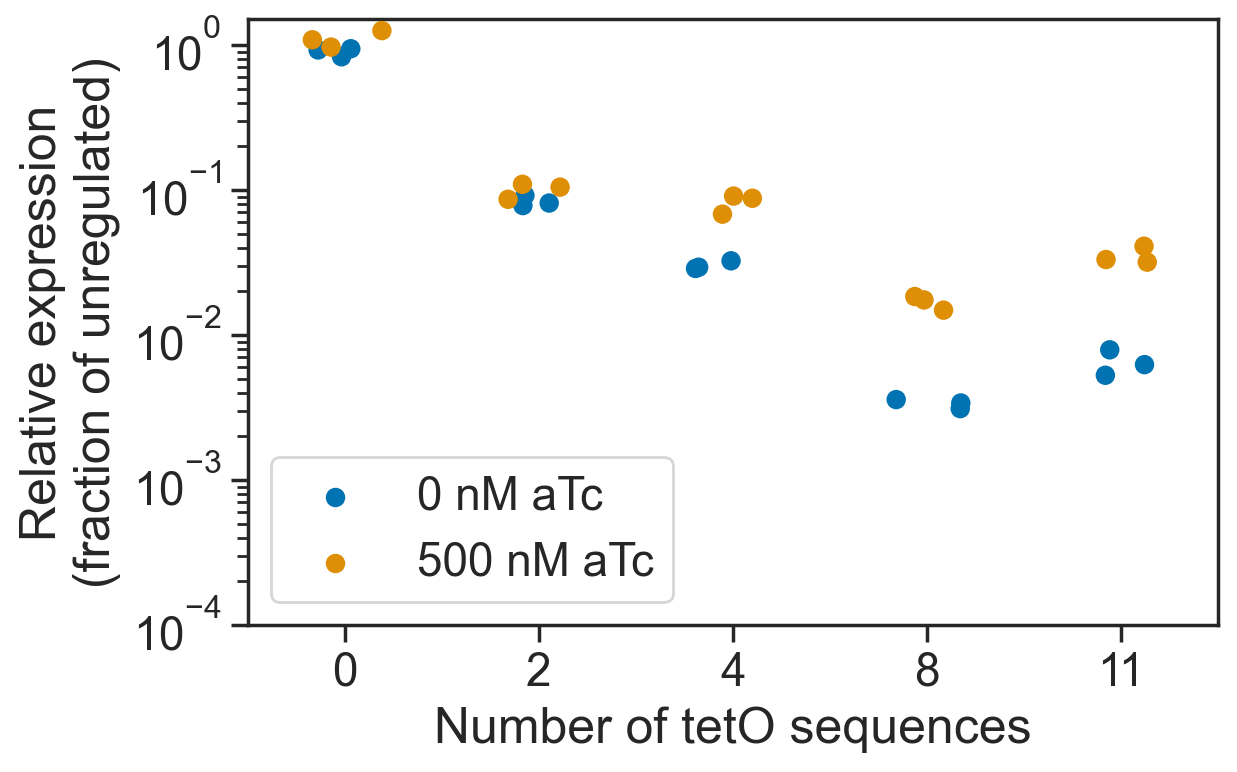

In [66]:
# Fig 1B
def plotFoldInduction(
        dat_in,sig_unreg,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pSG372_NoApt','pSG372','pPC02','pPC03','pPC04','pPC05']):
    
    dat = dat_in.reset_index(drop=True)
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['fluc_off']/dat['rluc_off'] ) / sig_unreg
    dat[lab_2] = ( dat['fluc_on']/dat['rluc_on'] ) / sig_unreg
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()
    ax = plt.subplot(1, 1, 1)
    ticks = order
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', 
                       size=7, jitter=0.2, data=dat_m, order=ticks)
    ax.set_yscale('log')
    ax.set(xlabel='Number of tetO sequences', ylabel="Relative expression\n(fraction of unregulated)")
    ax.set_xticks(ticks)
    ax.set_xticklabels(['0','2','4','8','11'],rotation=0)
    plt.ylim(1e-4,1.5)
    plt.legend(title='', loc='lower left')
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])
    
dat = pd.read_csv('dat/Steric interference parasite data—tetO copy number - csv2.csv')
dat_Apt = dat.loc[dat['Strain'].isin(['pPC07','pPC08','pPC09','pPC10','pSG372_NoApt']),].copy()
plotFoldInduction(dat_Apt,sig_unreg,'dat_Apt',order=['pSG372_NoApt','pPC07','pPC08','pPC09','pPC10'])

Strain
pPC02            7.336386
pPC03           18.827432
pPC04           37.746723
pPC05           18.211860
pSG372          12.232954
pSG372_NoApt     1.228259
Name: fold_ind, dtype: float64


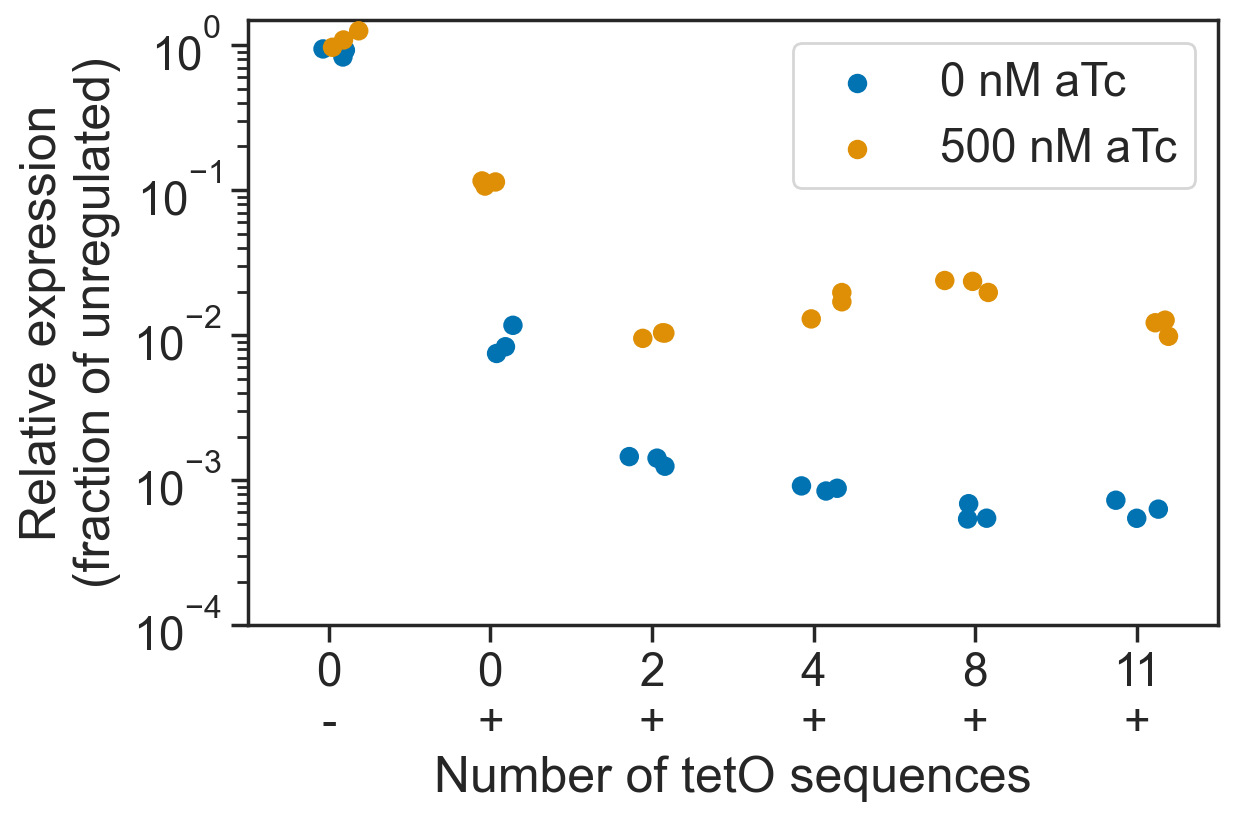

In [67]:
# Fig 1C
def plotFoldInduction(
        dat_in,sig_unreg,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pSG372_NoApt','pSG372','pPC02','pPC03','pPC04','pPC05']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['fluc_off']/dat['rluc_off'] ) / sig_unreg
    dat[lab_2] = ( dat['fluc_on']/dat['rluc_on'] ) / sig_unreg

    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()
    ax = plt.subplot(1, 1, 1)
    ticks = order
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', 
                       size=7, jitter=0.2, data=dat_m, order=ticks)
    ax.set_yscale('log')
    ax.set(xlabel='Number of tetO sequences', ylabel="Relative expression\n(fraction of unregulated)")
    ax.set_xticks(ticks)
    ax.set_xticklabels(['0\n-','0\n+','2\n+','4\n+','8\n+','11\n+'],rotation=0)
    plt.ylim(1e-4,1.5)
    plt.legend(title='', loc='upper right')
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])
    
dat = pd.read_csv('dat/Steric interference parasite data—tetO copy number - csv2.csv')
dat_noApt = dat.loc[dat['Strain'].isin(['pPC02','pPC03','pPC04','pPC05','pSG372','pSG372_NoApt']),].copy()
plotFoldInduction(dat_noApt,sig_unreg,'dat_noApt',order=['pSG372_NoApt','pSG372','pPC02','pPC03','pPC04','pPC05'])

In [6]:
# Figure S1

Strain
pPC009     5.024751
pPC032     8.106838
pPC071    20.555853
pPC072     4.194706
pPC082    60.846540
Name: fold_ind, dtype: float64


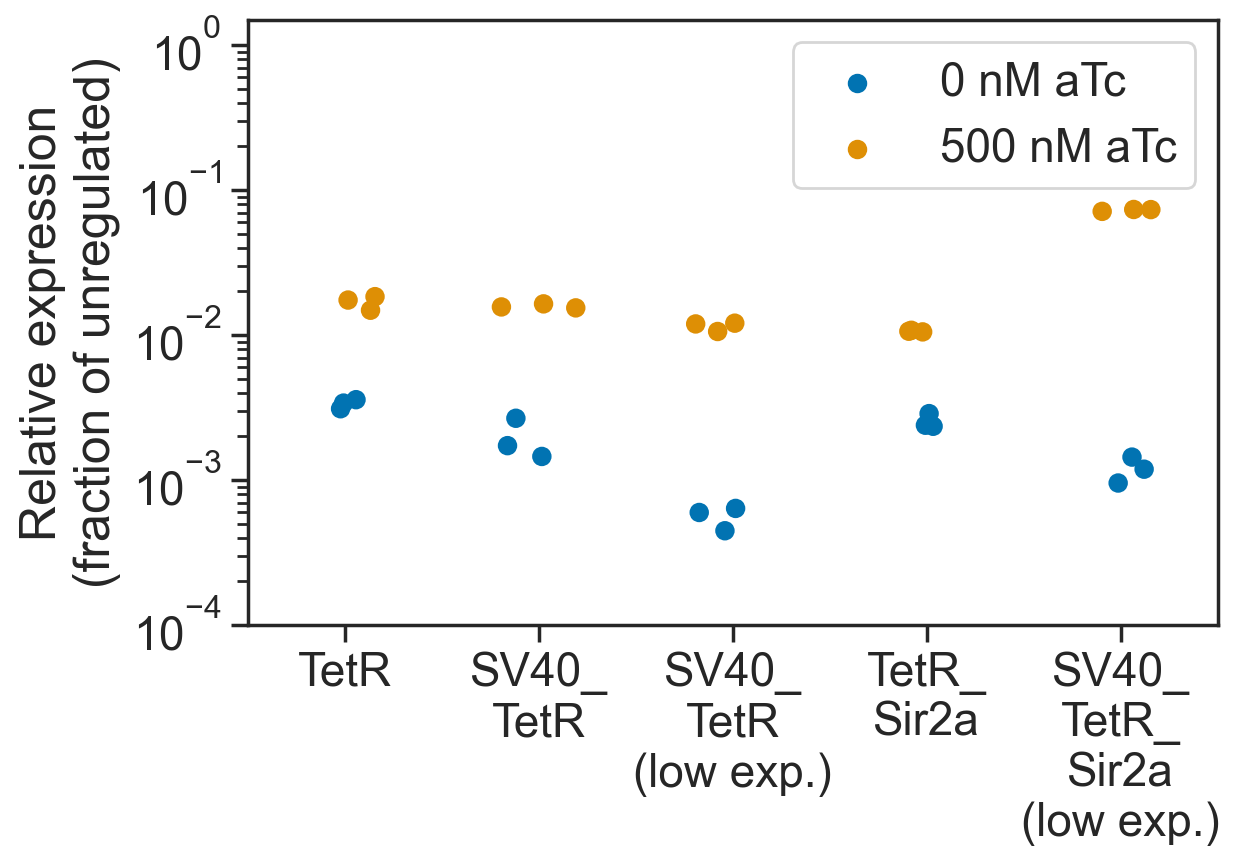

In [70]:
# Fig S1A
def plotFoldInduction(
        dat_in,sig_unreg,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pPC009','pPC032','pPC071','pPC072','pPC082']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    
    dat.loc[dat['Strain']=='pPC071','rluc_off'] = dat.loc[dat['Strain']=='pPC071','rluc_off']
    dat.loc[dat['Strain']=='pPC071','rluc_on'] = dat.loc[dat['Strain']=='pPC071','rluc_on']
    dat.loc[dat['Strain']=='pPC082','rluc_off'] = dat.loc[dat['Strain']=='pPC082','rluc_off']
    dat.loc[dat['Strain']=='pPC082','rluc_on'] = dat.loc[dat['Strain']=='pPC082','rluc_on']
    
    dat[lab_1] = ( dat['fluc_off']/dat['rluc_off'] ) / sig_unreg
    dat[lab_2] = ( dat['fluc_on']/dat['rluc_on'] ) / sig_unreg

    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat.loc[dat['Strain']=='pPC071',lab_1] = dat.loc[dat['Strain']=='pPC071',lab_1] *sig_unreg/sig_unreg_pmrpl2
    dat.loc[dat['Strain']=='pPC082',lab_1] = dat.loc[dat['Strain']=='pPC082',lab_1] *sig_unreg/sig_unreg_pmrpl2
    dat.loc[dat['Strain']=='pPC071',lab_2] = dat.loc[dat['Strain']=='pPC071',lab_2] *sig_unreg/sig_unreg_pmrpl2
    dat.loc[dat['Strain']=='pPC082',lab_2] = dat.loc[dat['Strain']=='pPC082',lab_2] *sig_unreg/sig_unreg_pmrpl2
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', size=7, jitter=0.2, data=dat_m)
    
    ax.set_yscale('log')
    ax.set(xlabel='', ylabel="Relative expression\n(fraction of unregulated)")
    ax.set_xticks(order)
    ax.set_xticklabels(['TetR','SV40_\nTetR','SV40_\nTetR\n(low exp.)','TetR_\nSir2a','SV40_\nTetR_\nSir2a\n(low exp.)'],rotation=0)#ax.get_xticklabels()
    plt.legend(title='')#bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.ylim(1e-4,1.5)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])
    
dat = pd.read_csv('dat/Fig 2 transcriptional regulation - Sheet1.csv')
dat_rep = dat.loc[dat['Strain'].isin(['pPC009','pPC032','pPC071','pPC072','pPC082']),].copy()
plotFoldInduction(dat_rep,sig_unreg,'dat_rep')

Strain
pPC009    0.994322
pPC032    2.075903
pPC071    0.728844
pPC072    1.087396
pPC082    0.469999
Name: fold_ind, dtype: float64


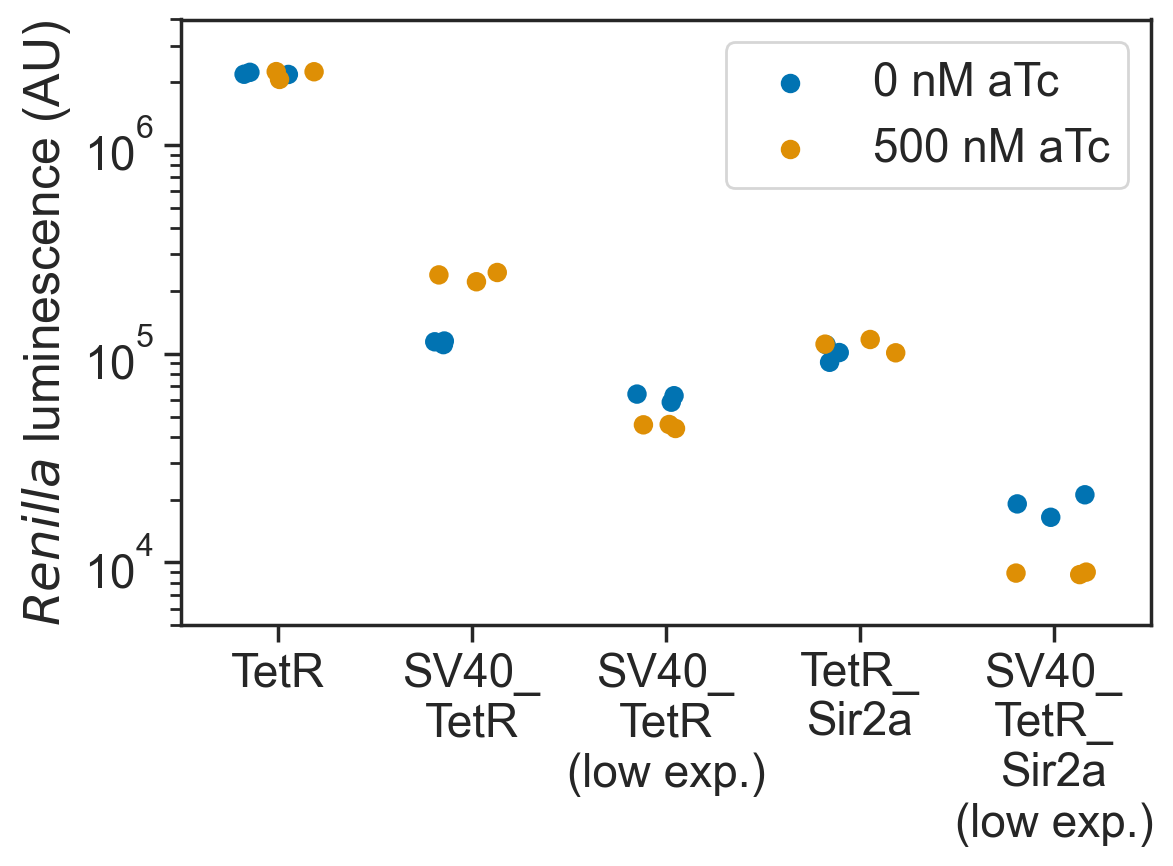

In [72]:
# Fig S1B
def plotFoldInduction(
        dat_in,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pPC009','pPC032','pPC071','pPC072','pPC082']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['rluc_off'])#/dat['rluc_off'] ) 
    dat[lab_2] = ( dat['rluc_on'])#/dat['rluc_on'] )

    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', size=7, jitter=0.2, data=dat_m)
    
    ax.set_yscale('log')
    ax.set(xlabel='', ylabel=r'$\it{Renilla}$ luminescence (AU)')
    ax.set_xticks(order)
    ax.set_xticklabels(['TetR','SV40_\nTetR','SV40_\nTetR\n(low exp.)','TetR_\nSir2a','SV40_\nTetR_\nSir2a\n(low exp.)'],rotation=0)#ax.get_xticklabels()
    plt.legend(title='')#bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.ylim(5e3,4e6)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])

dat = pd.read_csv('dat/Fig 2 transcriptional regulation - Sheet1.csv')
dat_rep = dat.loc[dat['Strain'].isin(['pPC009','pPC032','pPC071','pPC072','pPC082']),].copy()
plotFoldInduction(dat_rep,'dat_rep')

Strain
pPC009    0.986441
pPC032    1.741935
pPC071    0.982143
pPC072    0.948276
pPC082    1.017544
Name: fold_ind, dtype: float64


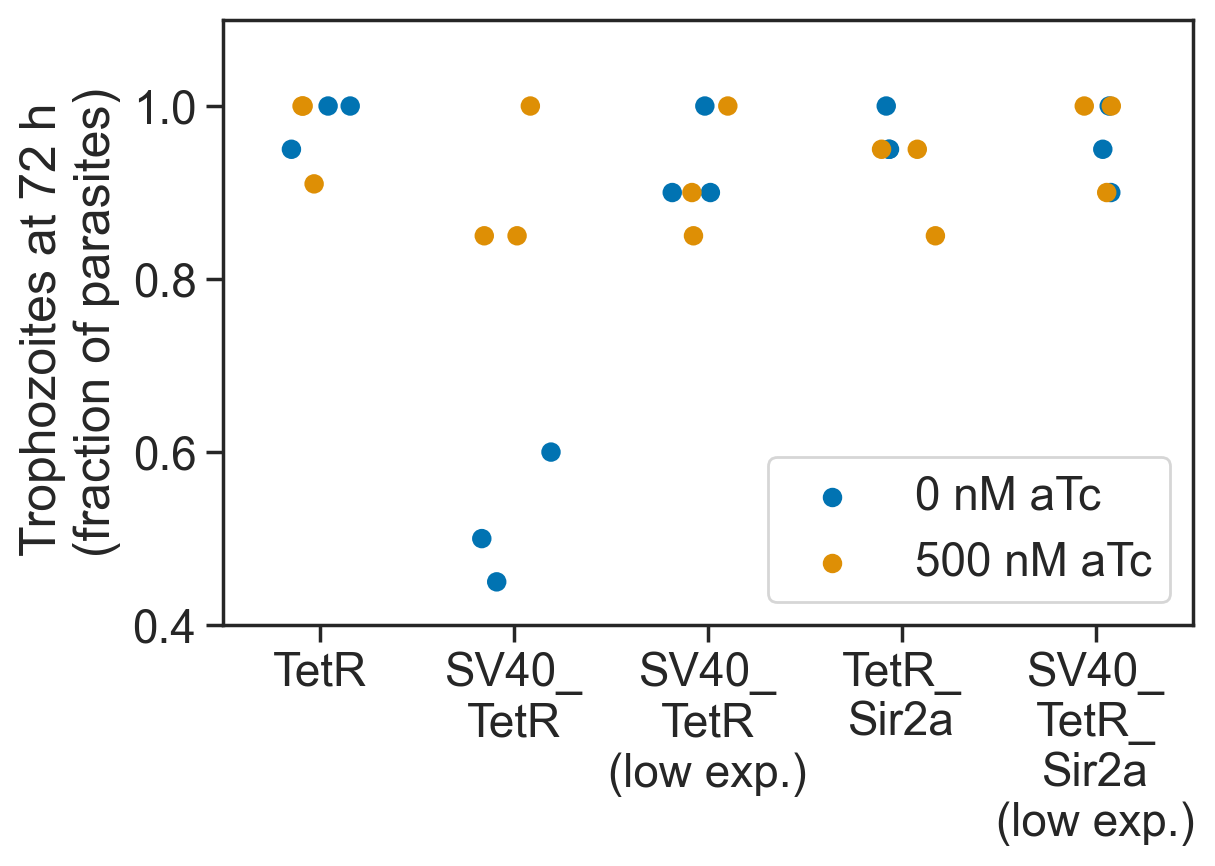

In [74]:
# Fig S1C
def plotFoldInduction(
        dat_in,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pPC009','pPC032','pPC071','pPC072','pPC082']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['Pct_troph_0'])#/dat['rluc_off'] ) 
    dat[lab_2] = ( dat['Pct_troph_1'])#/dat['rluc_on'] )
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', size=7, jitter=0.2, data=dat_m)
    
#     ax.set_yscale('log')
    ax.set(xlabel='', ylabel="Trophozoites at 72 h \n(fraction of parasites)")
    ax.set_xticks(order)
    ax.set_xticklabels(['TetR','SV40_\nTetR','SV40_\nTetR\n(low exp.)','TetR_\nSir2a','SV40_\nTetR_\nSir2a\n(low exp.)'],rotation=0)#ax.get_xticklabels()
    plt.legend(title='')#bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.ylim(0.4,1.1)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])

dat = pd.read_csv('dat/Fig 2 transcriptional regulation - Sheet1.csv')
dat_rep = dat.loc[dat['Strain'].isin(['pPC009','pPC032','pPC071','pPC072','pPC082']),].copy()
plotFoldInduction(dat_rep,'dat_rep')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


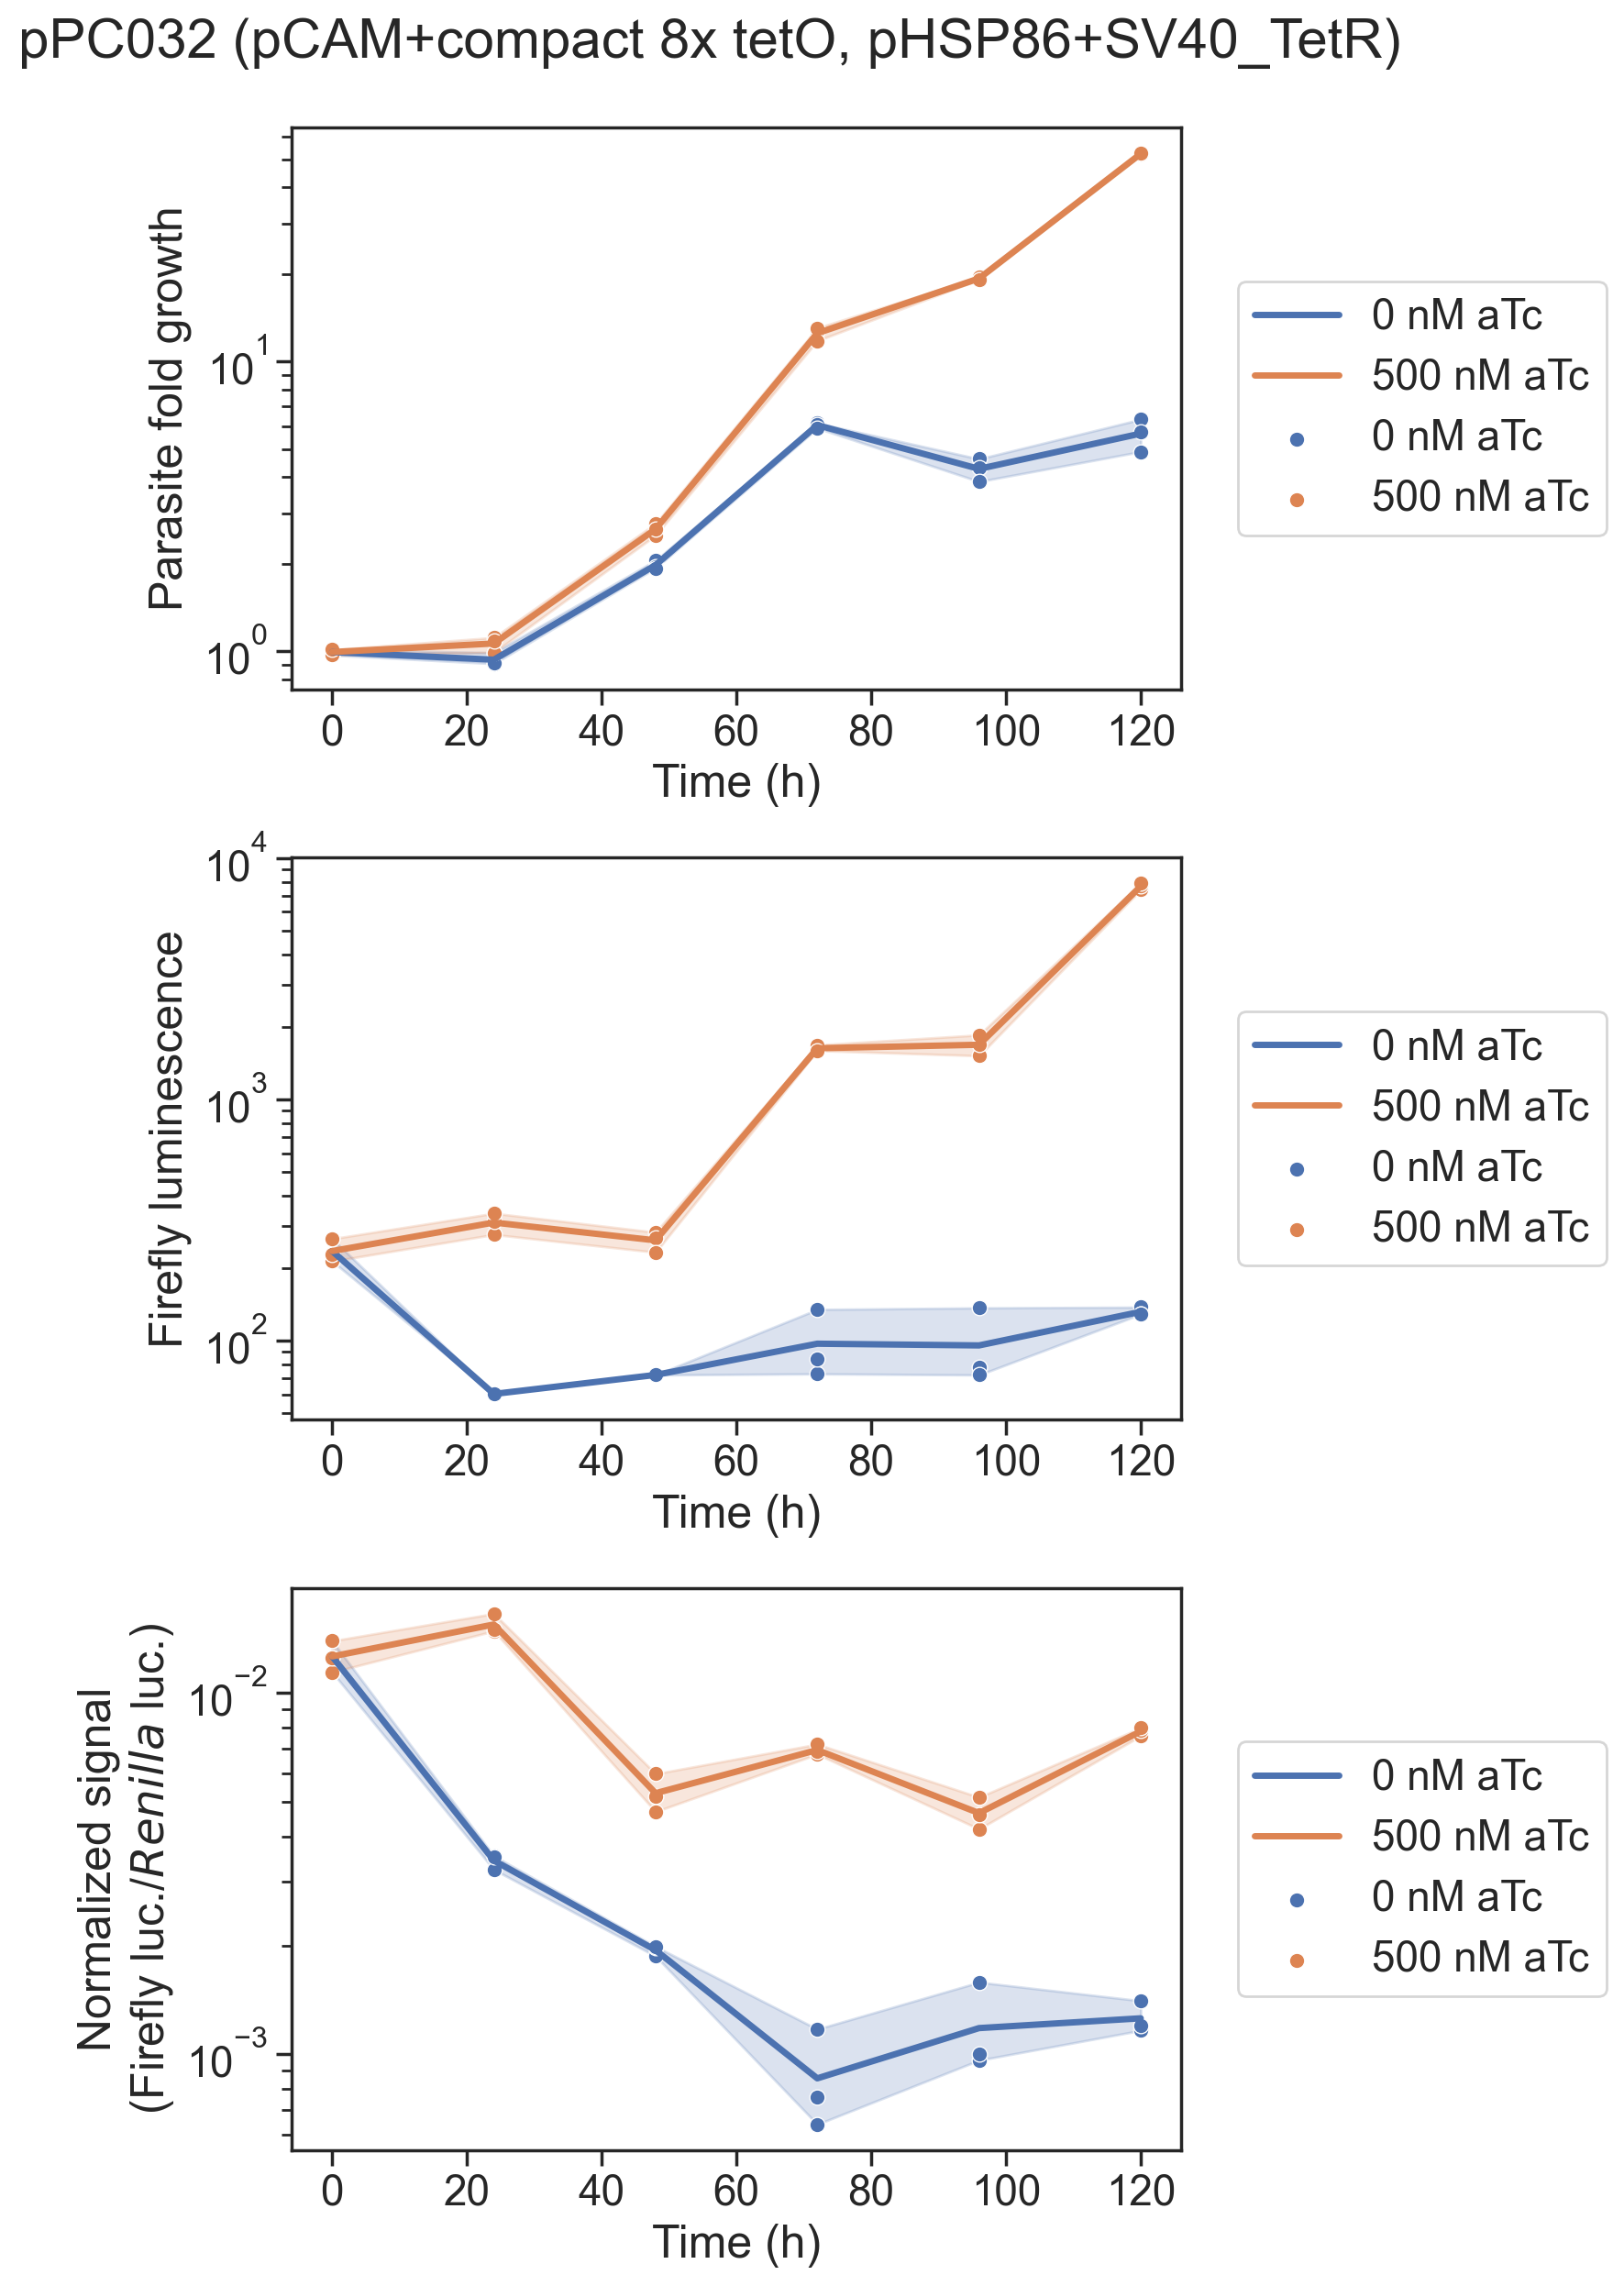

In [75]:
# Fig S1D
def plotLines(
        x,y_1,y_2,lab_1='0 nM aTc',lab_2='500 nM aTc',
        x_lab='Time (h)',y_lab=r'$\it{Renilla}$ luminescence',
        log_scale=True, palette=sns.color_palette(), y_lim=None):
    ax = sns.lineplot(x=x,y=y_1, label = lab_1, color=palette[0])
    ax = sns.lineplot(x=x,y=y_2, label = lab_2, color=palette[1])
    ax = sns.scatterplot(x=x,y=y_1, label = lab_1, color=palette[0])
    ax = sns.scatterplot(x=x,y=y_2, label = lab_2, color=palette[1])
    if log_scale:
        ax.set_yscale('log')
        
    if y_lim is not None:
        plt.ylim(y_lim[0],y_lim[1])
        
    ax.set(xlabel=x_lab, ylabel=y_lab)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
    
    return ax

def plotTimeSeries(
        dat,title,lab_1='0 nM aTc',lab_2='200 nM aTc',
        log_scale=True,threshold=0.25,sig_unreg=sig_unreg):
    
    fig, ax = plt.subplots(figsize=(6,12), dpi=200)
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    fig.suptitle(title,y=1.02)
    
    ax = plt.subplot(3, 1, 1)
    rluc_off = np.maximum(dat.RLuc_0aTc-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    fluc_off = np.maximum(dat.FLuc_0aTc-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    rluc_on = np.maximum(dat.RLuc_1aTc-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    fluc_on = np.maximum(dat.FLuc_1aTc-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    grow_off = rluc_off / rluc_off[0]
    grow_on = rluc_on / rluc_on[0]
    plotLines(
        dat.Hours,grow_off,grow_on,
        x_lab='Time (h)',y_lab='Parasite fold growth',
#         dat.Hours,rluc_off,rluc_on,
#         x_lab='Time (h)',y_lab=r'$\it{Renilla}$ luminescence',
        lab_1=lab_1,lab_2=lab_2,log_scale=log_scale
        )
    
    ax = plt.subplot(3, 1, 2)
    plotLines(
        dat.Hours,fluc_off,fluc_on,
        x_lab='Time (h)',y_lab='Firefly luminescence',
        lab_1=lab_1,lab_2=lab_2,log_scale=log_scale
        )
    
    ax = plt.subplot(3, 1, 3)
    plotLines(
        dat.Hours,(fluc_off/rluc_off),(fluc_on/rluc_on),
        x_lab='Time (h)',y_lab='Normalized signal\n(Firefly luc./$\it{Renilla}$ luc.)',
        lab_1=lab_1,lab_2=lab_2,log_scale=log_scale#,y_lim=[3e-4,3e-1]
        )
    
#     plt.savefig(title+'.png', bbox_inches='tight')
    
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Nov 2021 - pPC032.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'pPC032 (pCAM+compact 8x tetO, pHSP86+SV40_TetR)',lab_1='0 nM aTc',lab_2='500 nM aTc')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


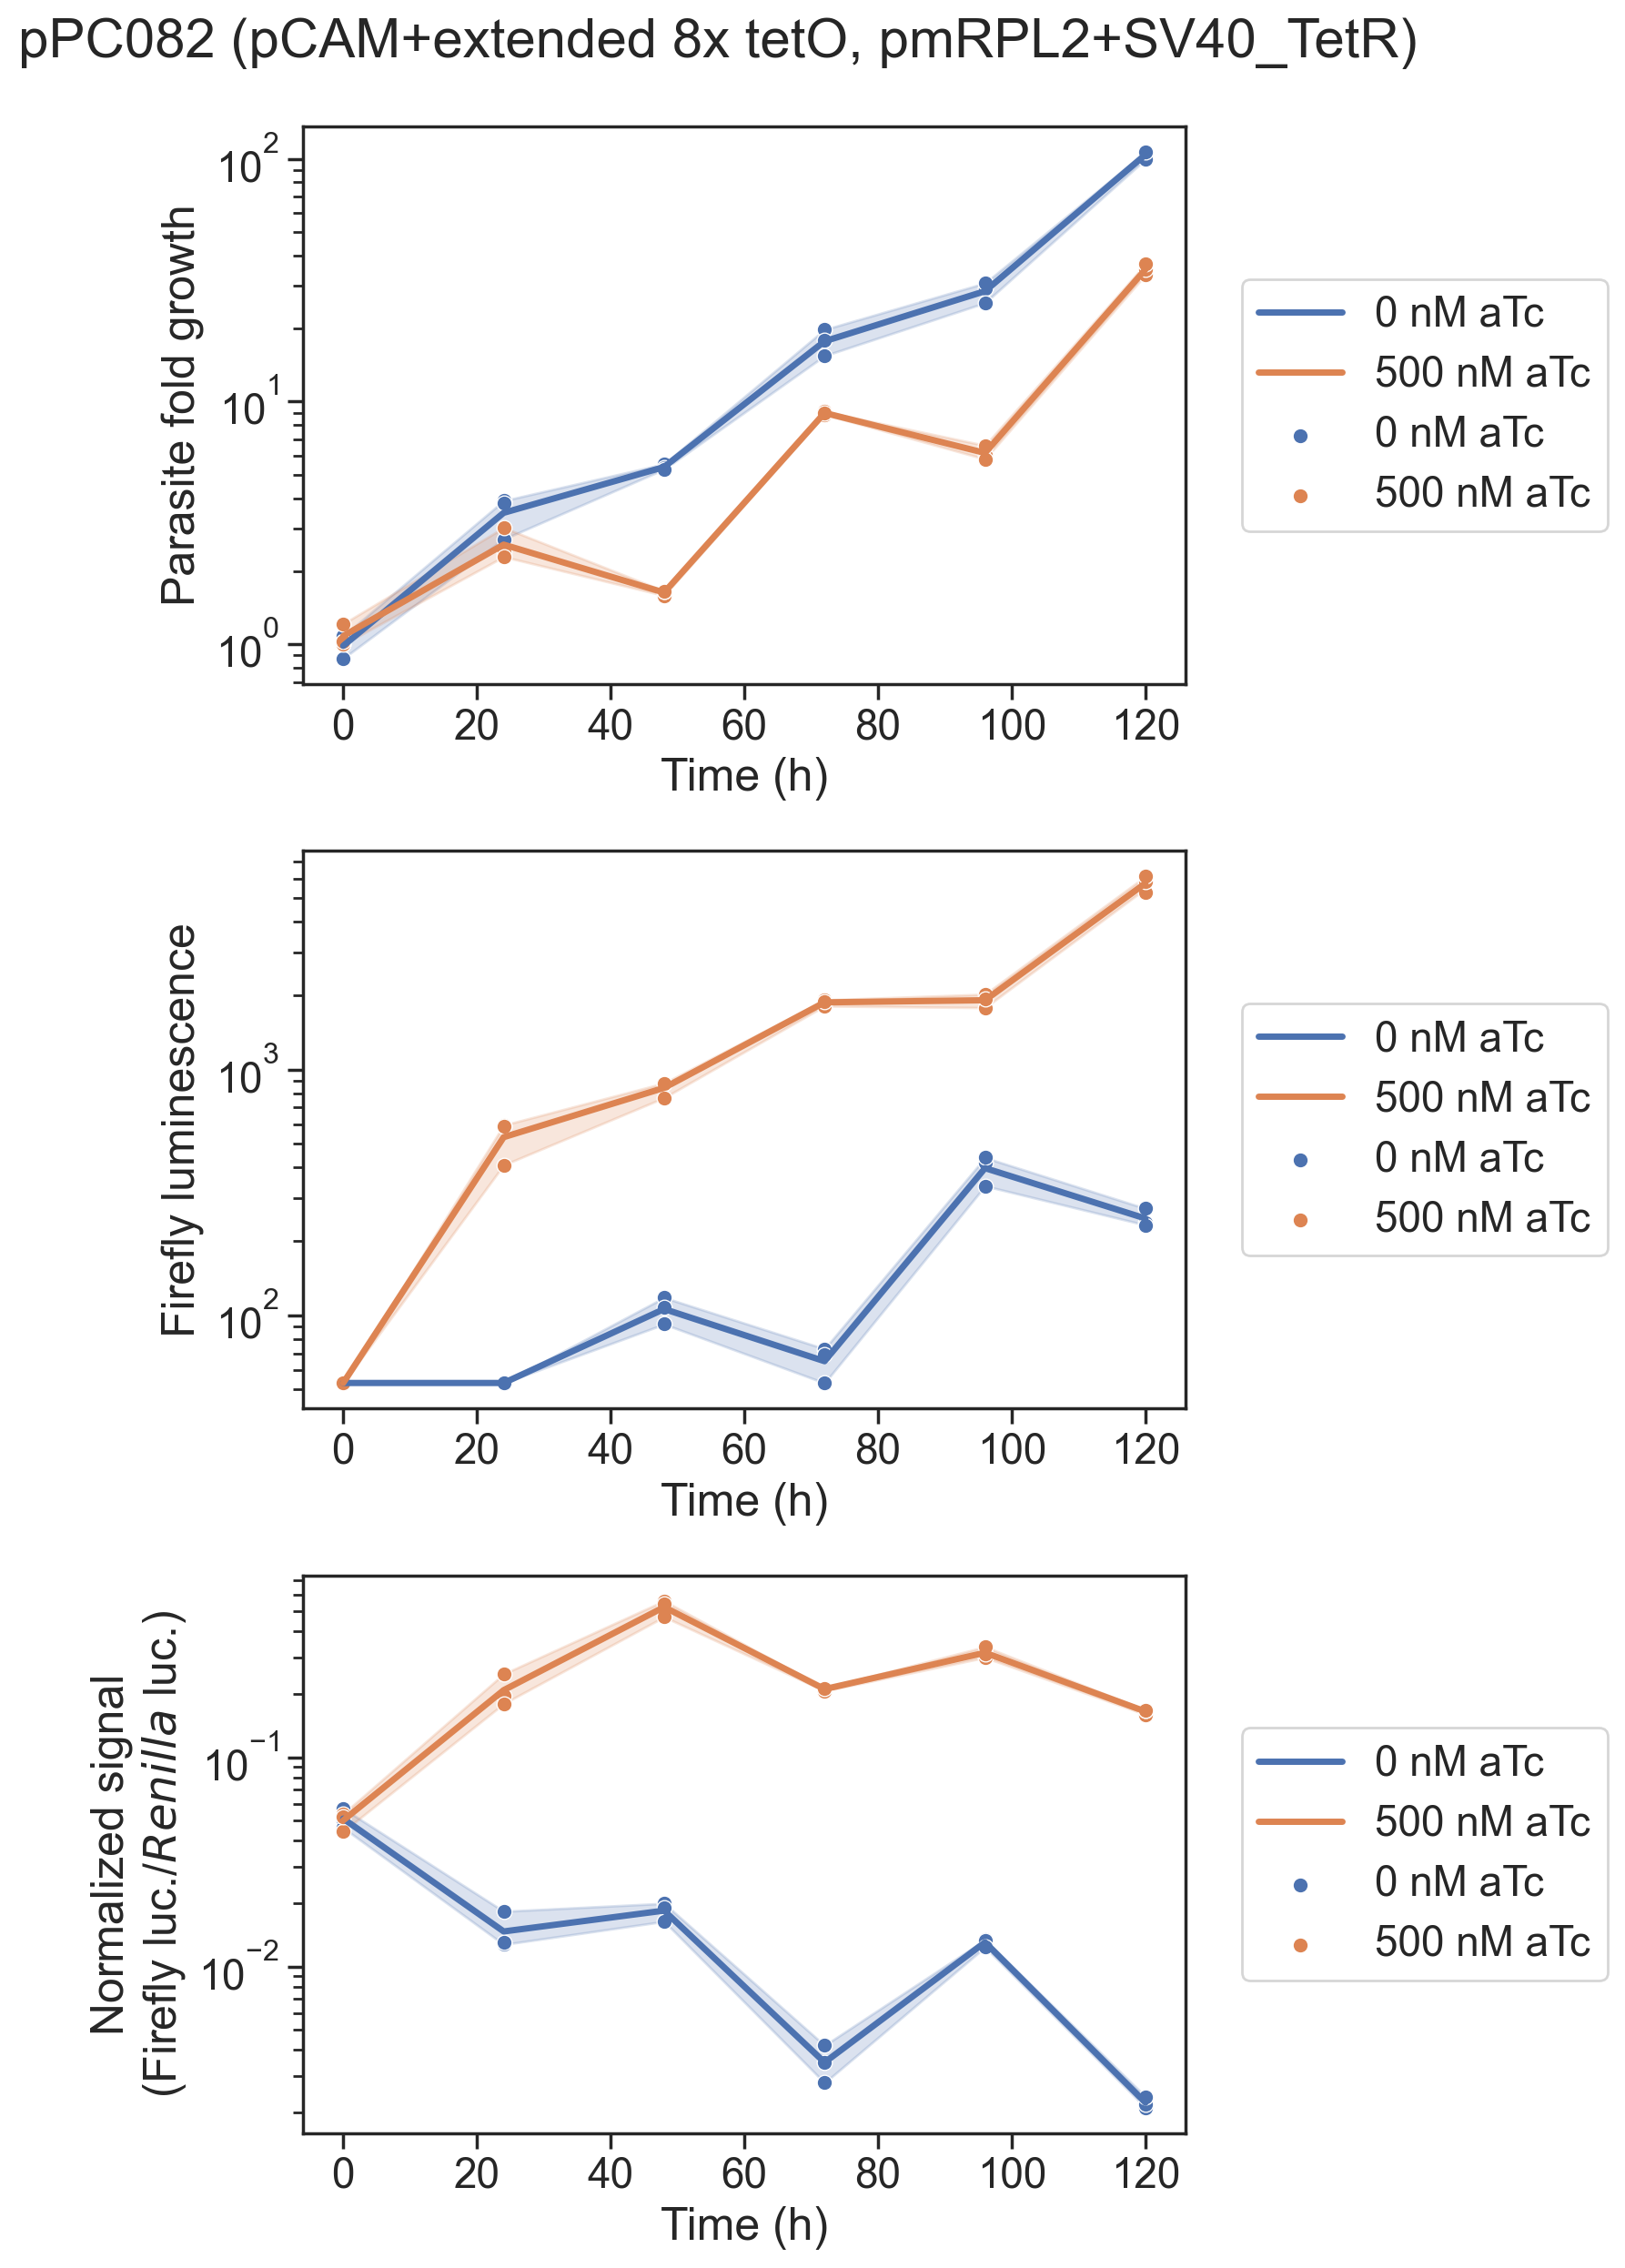

In [76]:
# Fig. S1E
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Apr 2022 - pPC082.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'dat/pPC082 (pCAM+extended 8x tetO, pmRPL2+SV40_TetR)',lab_1='0 nM aTc',lab_2='500 nM aTc')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


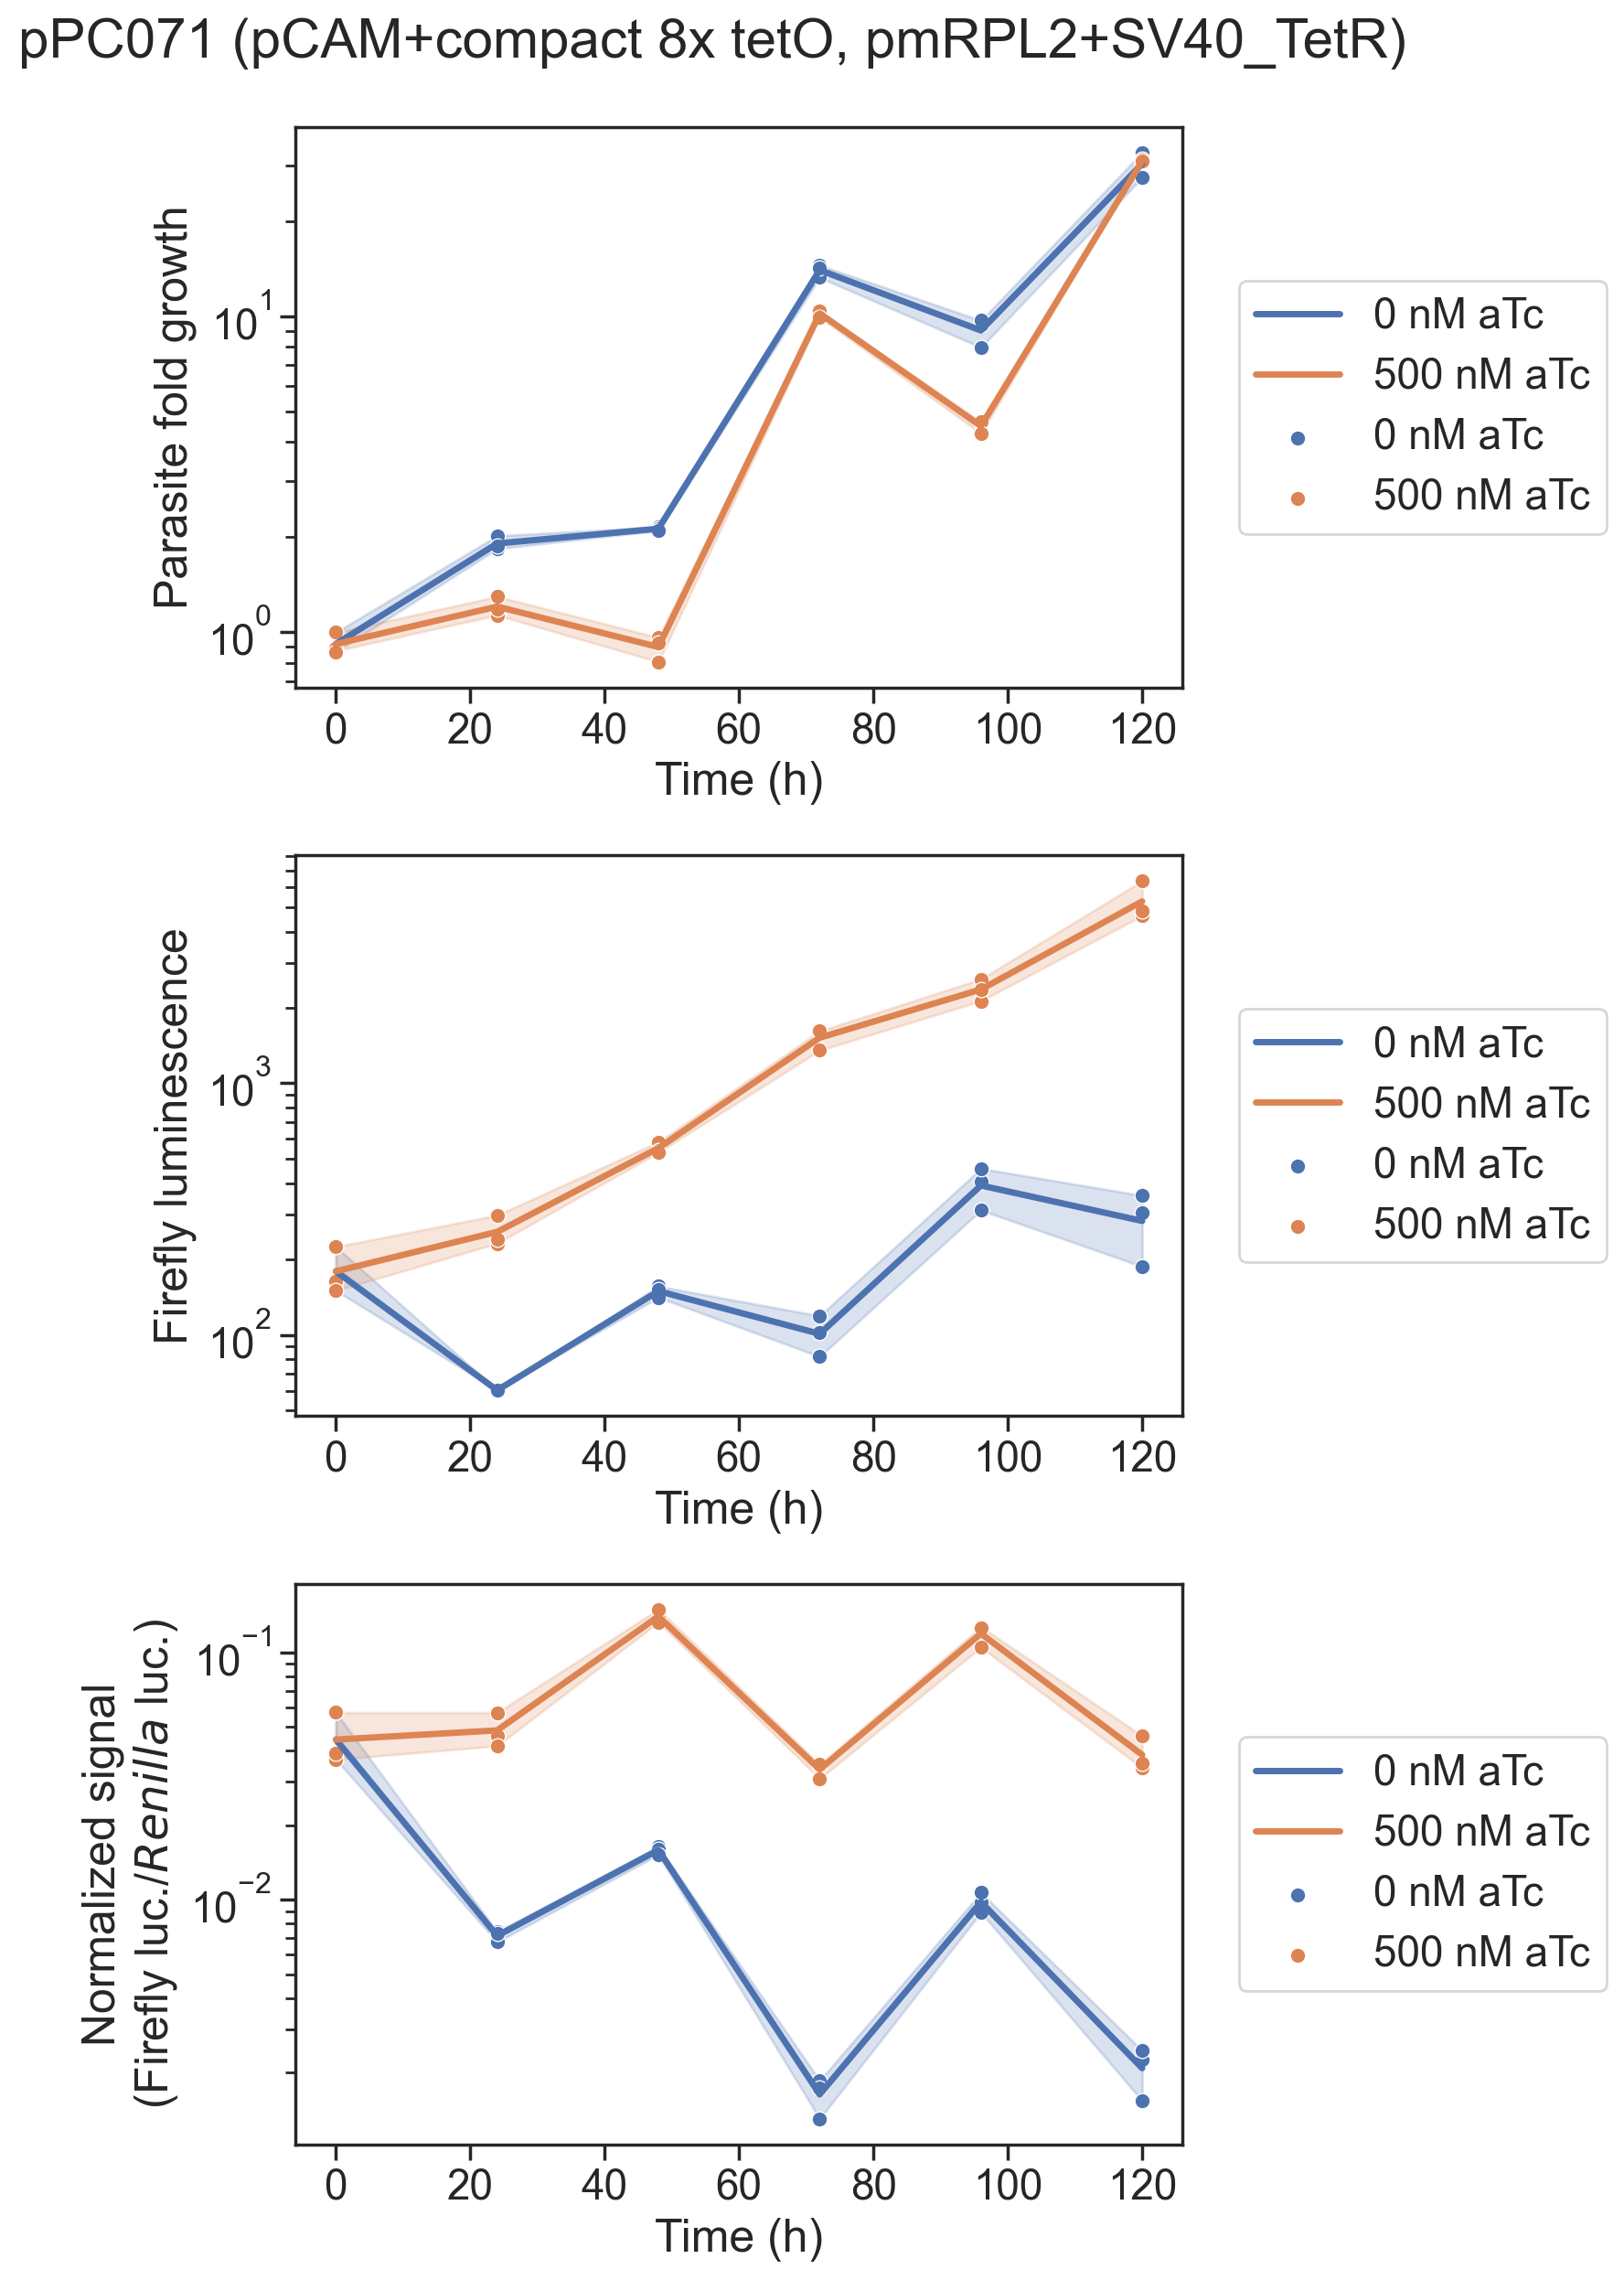

In [77]:
# Fig. S1F
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Nov 2021 - pPC071.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'dat/pPC071 (pCAM+compact 8x tetO, pmRPL2+SV40_TetR)',lab_1='0 nM aTc',lab_2='500 nM aTc')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


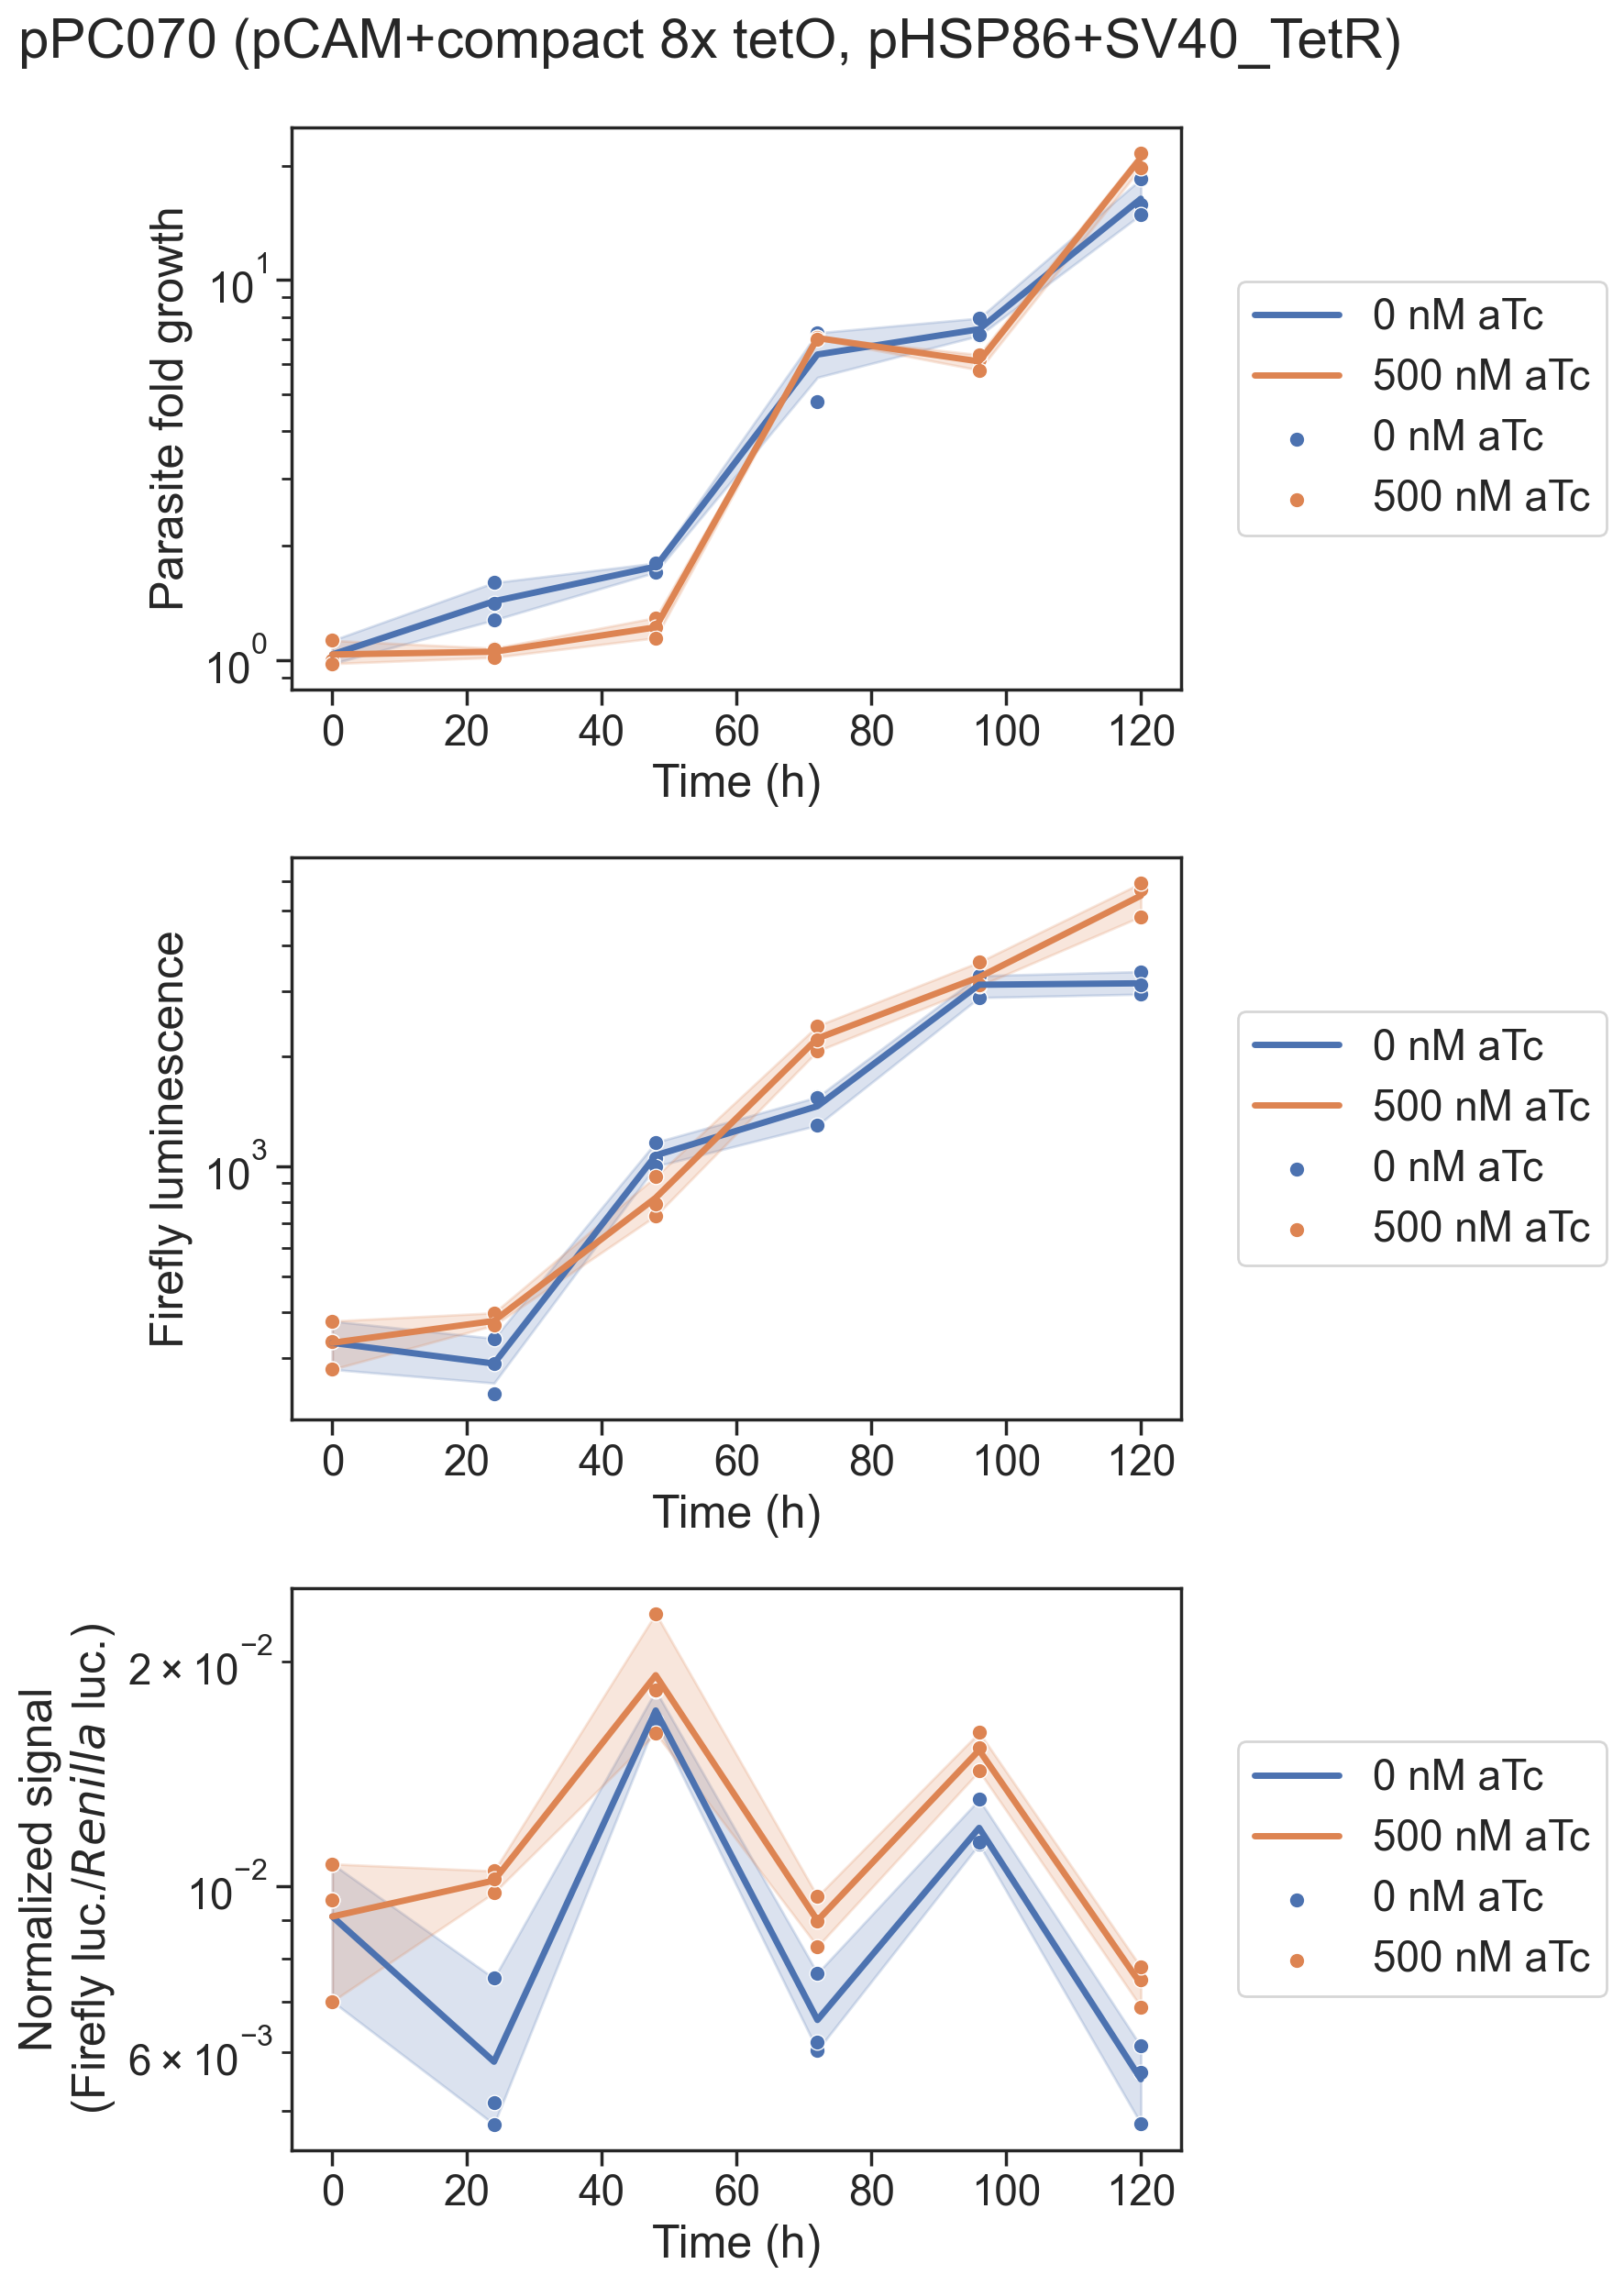

In [78]:
# Fig. S1F
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Nov 2021 - pPC070.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'dat/pPC070 (pCAM+compact 8x tetO, pHSP86+SV40_TetR)',lab_1='0 nM aTc',lab_2='500 nM aTc')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


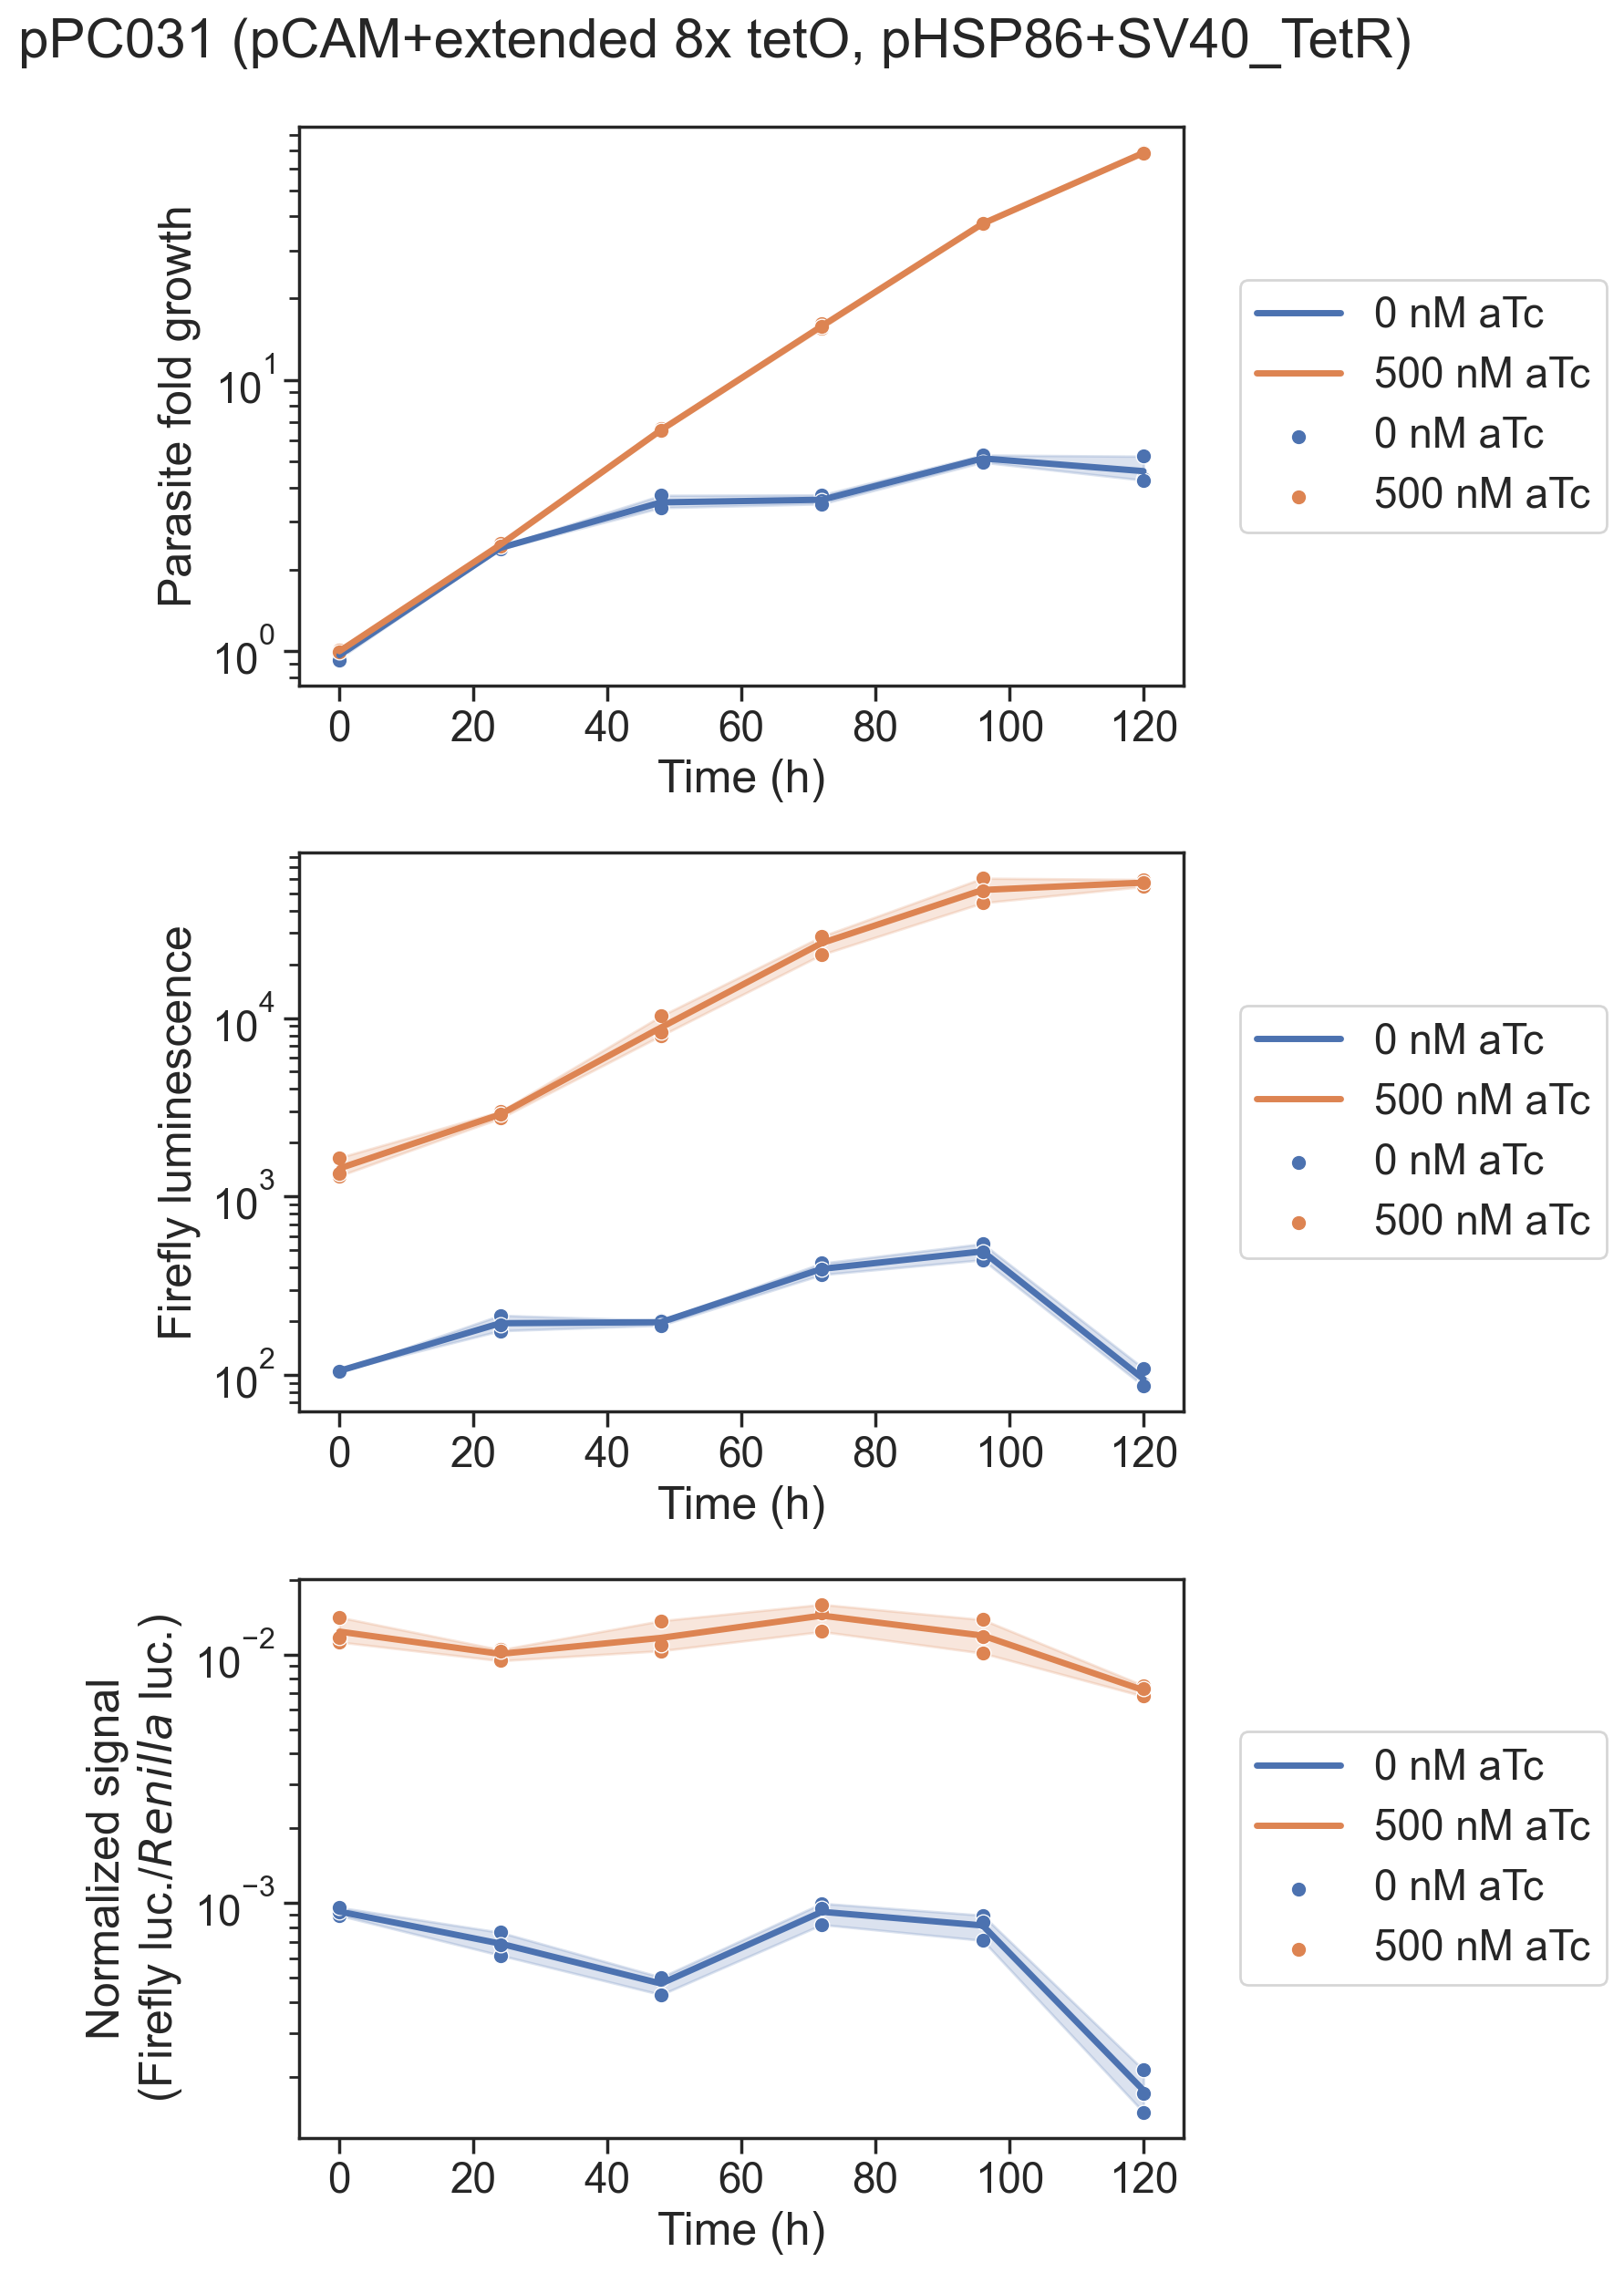

In [79]:
# Fig. 2C

dat = pd.read_csv('Steric interference parasite data—Feb 2021 Experiments - pPC031 reformatted.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'dat/pPC031 (pCAM+extended 8x tetO, pHSP86+SV40_TetR)',lab_1='0 nM aTc',lab_2='500 nM aTc')

Strain
pPC038     21.506934
pPC040      1.846294
pPC088    182.118930
pPC089    409.052087
pPC126      7.370932
Name: fold_ind, dtype: float64


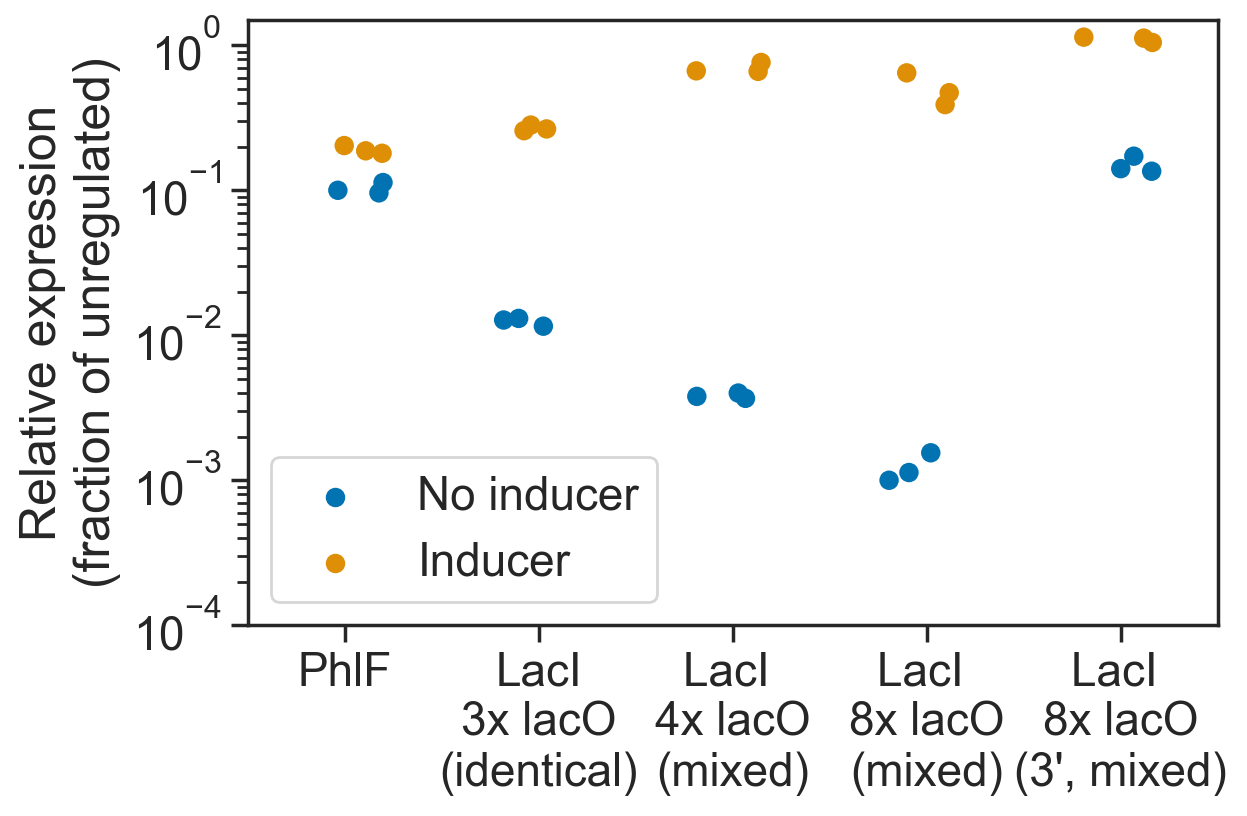

In [81]:
# Fig S2A
def plotFoldInduction(
        dat_in,sig_unreg,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pPC040','pPC038','pPC088','pPC089','pPC126']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['fluc_off']/dat['rluc_off'] ) / sig_unreg
    dat[lab_2] = ( dat['fluc_on']/dat['rluc_on'] ) / sig_unreg
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ticks = order
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', size=7, jitter=0.2, data=dat_m)
    
    ax.set_yscale('log')
    ax.set(xlabel='', ylabel="Relative expression\n(fraction of unregulated)")
    ax.set_xticks(ticks)
    ax.set_xticklabels(['PhlF','LacI\n3x lacO\n(identical)','LacI \n4x lacO\n(mixed)','LacI \n8x lacO\n(mixed)','LacI \n8x lacO\n(3\', mixed)'],rotation=0)#ax.get_xticklabels()
    plt.legend(title='')#bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.ylim(1e-4,1.5)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])
    
dat = pd.read_csv('dat/Fig 2 transcriptional regulation - Sheet1.csv')
dat_tet = dat.loc[dat['Strain'].isin(['pPC040','pPC038','pPC088','pPC089','pPC126']),].copy()
plotFoldInduction(dat_tet,sig_unreg,'dat_tet',lab_1='No inducer',lab_2='Inducer')

Strain
pPC038    1.000000
pPC040    1.081160
pPC088    0.980657
pPC089    1.125770
pPC126    0.966996
Name: fold_ind, dtype: float64


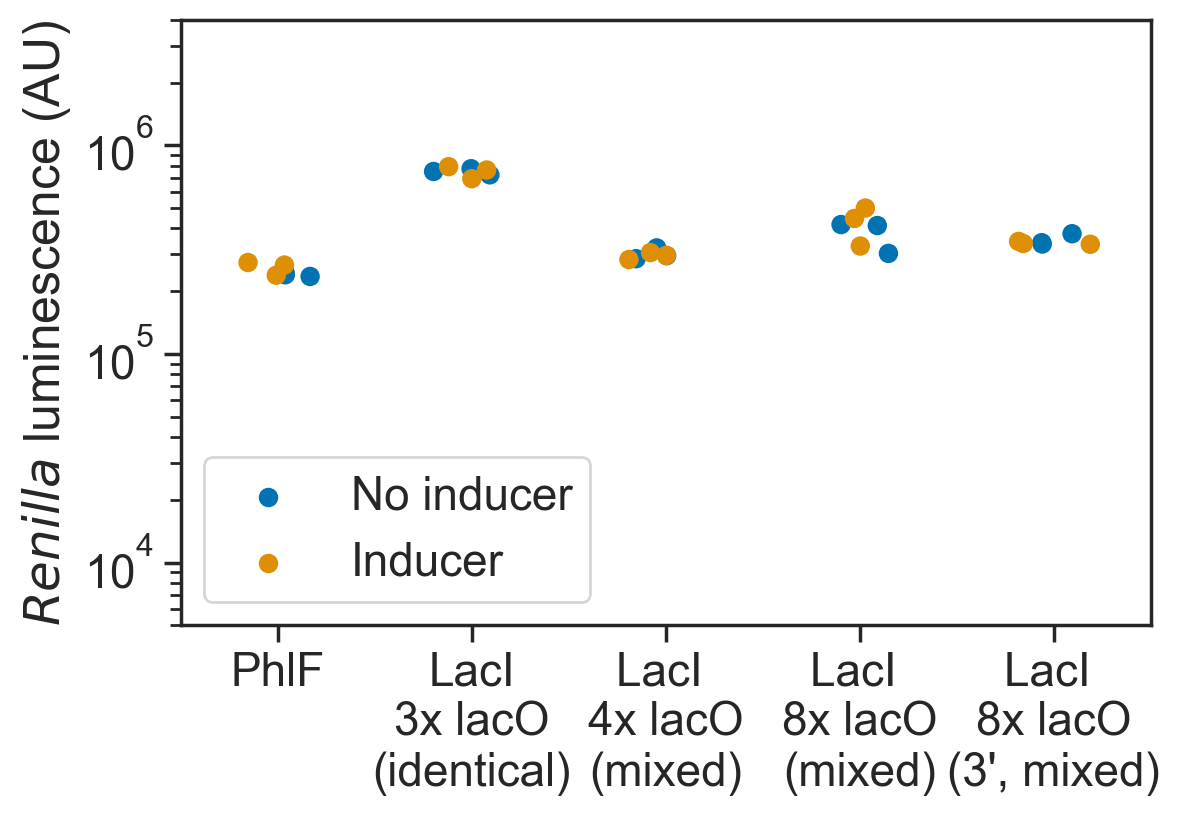

In [83]:
# Fig S2B
def plotFoldInduction(
        dat_in,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pPC040','pPC038','pPC088','pPC089','pPC126']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['rluc_off'])#/dat['rluc_off'] ) 
    dat[lab_2] = ( dat['rluc_on'])#/dat['rluc_on'] )
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ticks = order
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', size=7, jitter=0.2, data=dat_m)
    
    ax.set_yscale('log')
    ax.set(xlabel='', ylabel=r'$\it{Renilla}$ luminescence (AU)')
    ax.set_xticks(ticks)
    ax.set_xticklabels(['PhlF','LacI\n3x lacO\n(identical)','LacI \n4x lacO\n(mixed)','LacI \n8x lacO\n(mixed)','LacI \n8x lacO\n(3\', mixed)'],rotation=0)
    plt.legend(title='',loc="lower left")
    plt.ylim(5e3,4e6)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])

dat = pd.read_csv('dat/Fig 2 transcriptional regulation - Sheet1.csv')
dat_tet = dat.loc[dat['Strain'].isin(['pPC040','pPC038','pPC088','pPC089','pPC126']),].copy()
plotFoldInduction(dat_tet,'dat_tet',lab_1='No inducer',lab_2='Inducer')

Strain
pPC038    1.000000
pPC040    1.000000
pPC088    1.017857
pPC089    1.074074
pPC126    1.000000
Name: fold_ind, dtype: float64


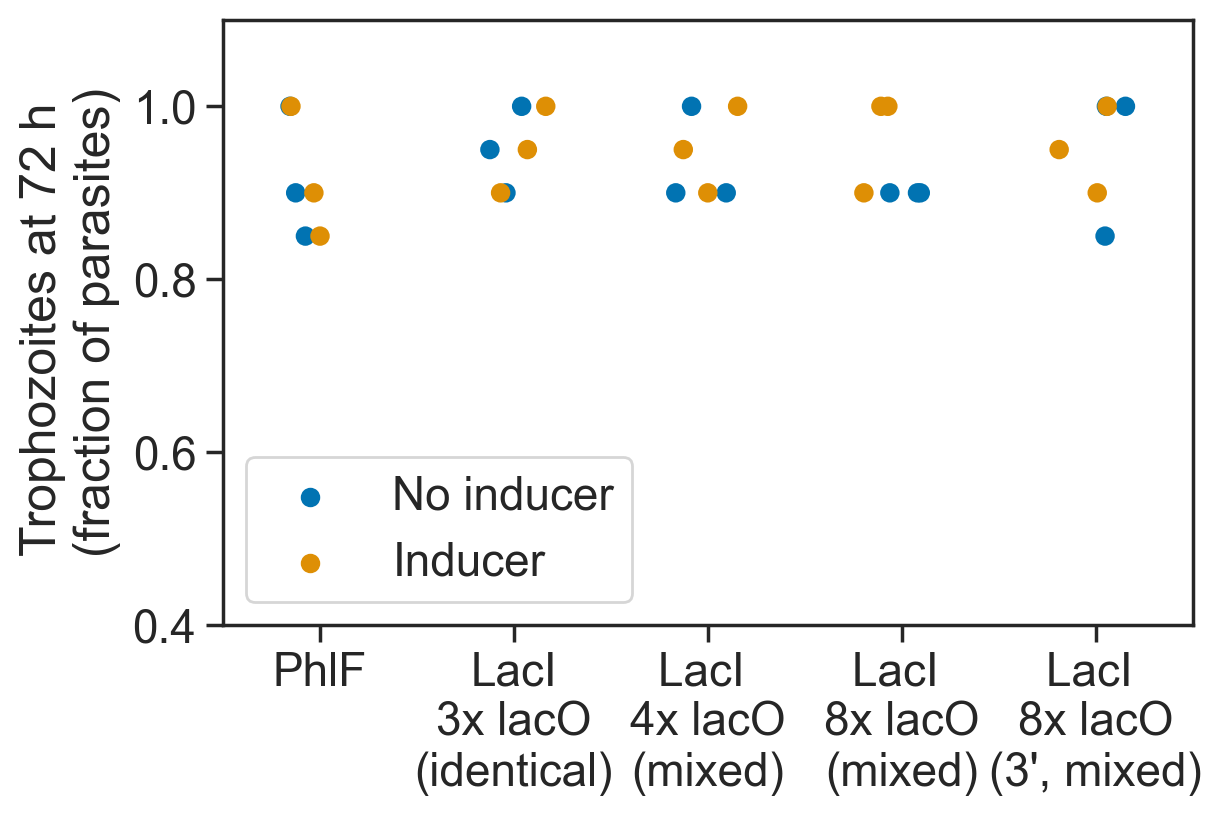

In [85]:
# Fig S2C
def plotFoldInduction(
        dat_in,title,lab_1='0 nM aTc',lab_2='500 nM aTc',
        log_scale=True,threshold=0.25,order=['pPC040','pPC038','pPC088','pPC089','pPC126']):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat[lab_1] = ( dat['Pct_troph_0'])#/dat['rluc_off'] ) 
    dat[lab_2] = ( dat['Pct_troph_1'])#/dat['rluc_on'] )
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ticks = order
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', size=7, jitter=0.2, data=dat_m)
    
#     ax.set_yscale('log')
    ax.set(xlabel='', ylabel="Trophozoites at 72 h \n(fraction of parasites)")
    ax.set_xticks(ticks)
    ax.set_xticklabels(['PhlF','LacI\n3x lacO\n(identical)','LacI \n4x lacO\n(mixed)','LacI \n8x lacO\n(mixed)','LacI \n8x lacO\n(3\', mixed)'],rotation=0)
    plt.legend(title='')#bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.ylim(0.4,1.1)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])

dat = pd.read_csv('dat/Fig 2 transcriptional regulation - Sheet1.csv')
dat_tet = dat.loc[dat['Strain'].isin(['pPC040','pPC038','pPC088','pPC089','pPC126']),].copy()
plotFoldInduction(dat_tet,'dat_tet',lab_1='No inducer',lab_2='Inducer')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


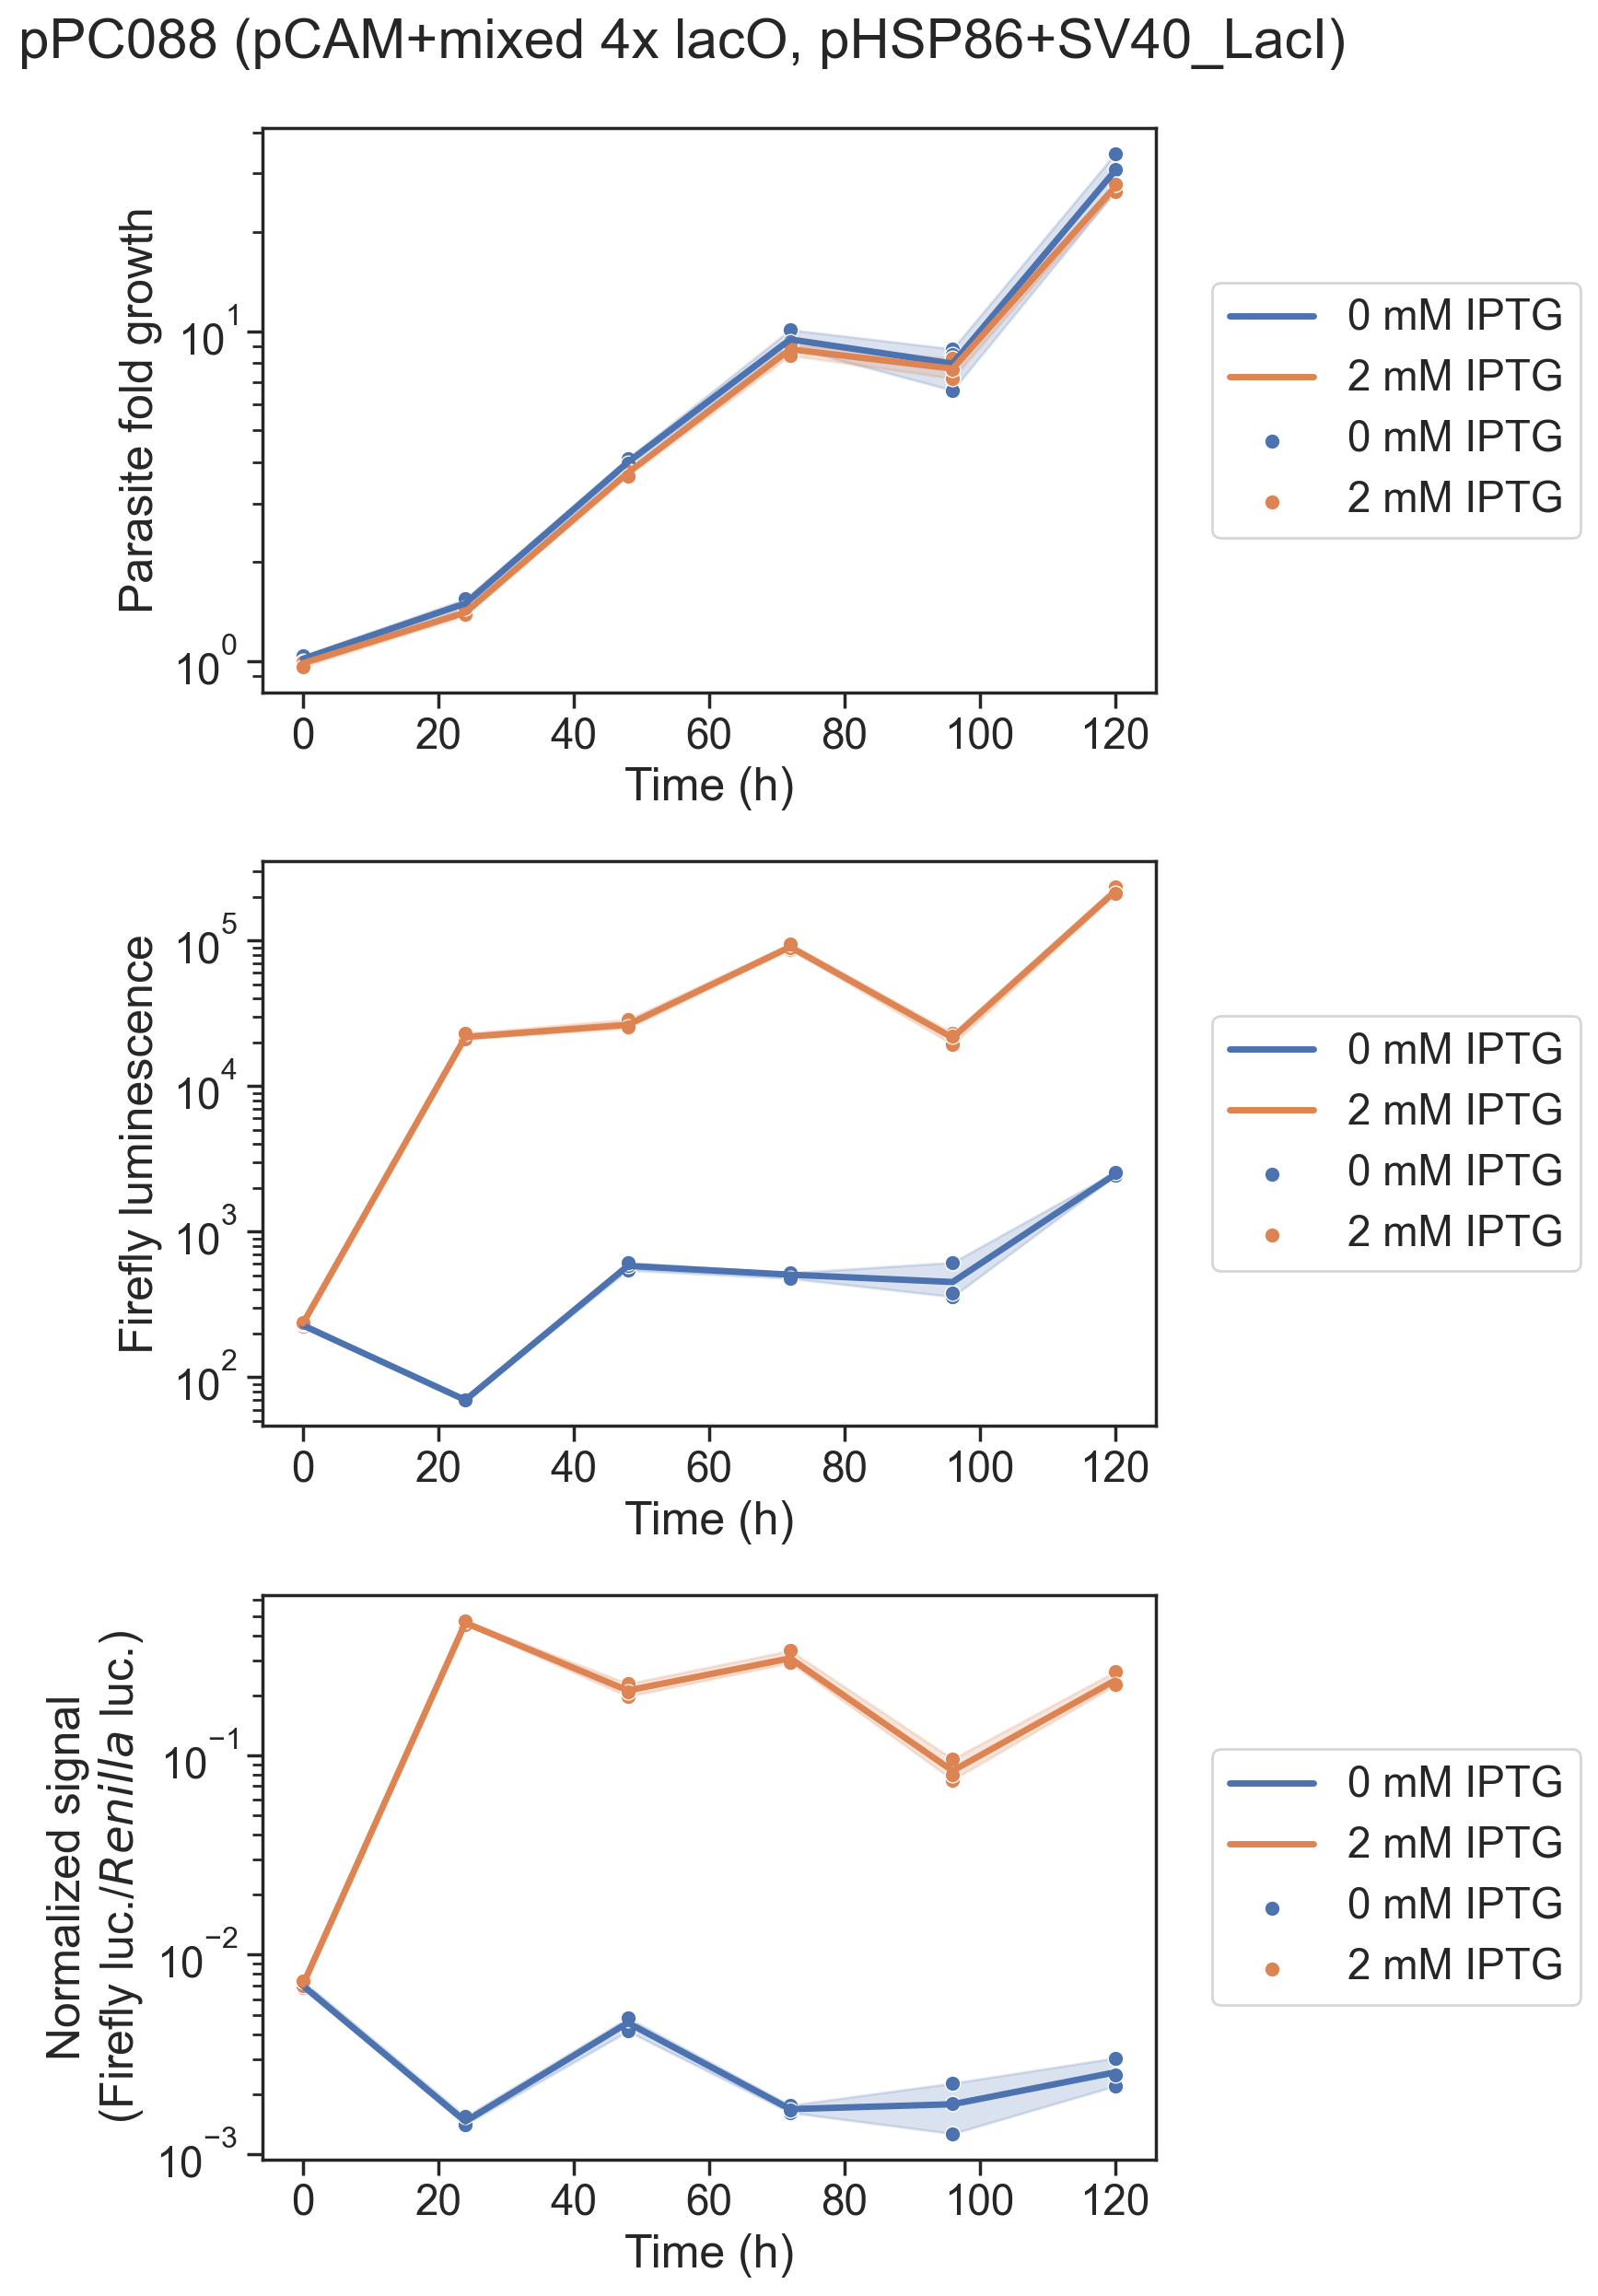

In [86]:
# Fig. S2D
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Apr 2022 - pPC088_try2.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'pPC088 (pCAM+mixed 4x lacO, pHSP86+SV40_LacI)',lab_1='0 mM IPTG',lab_2='2 mM IPTG')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


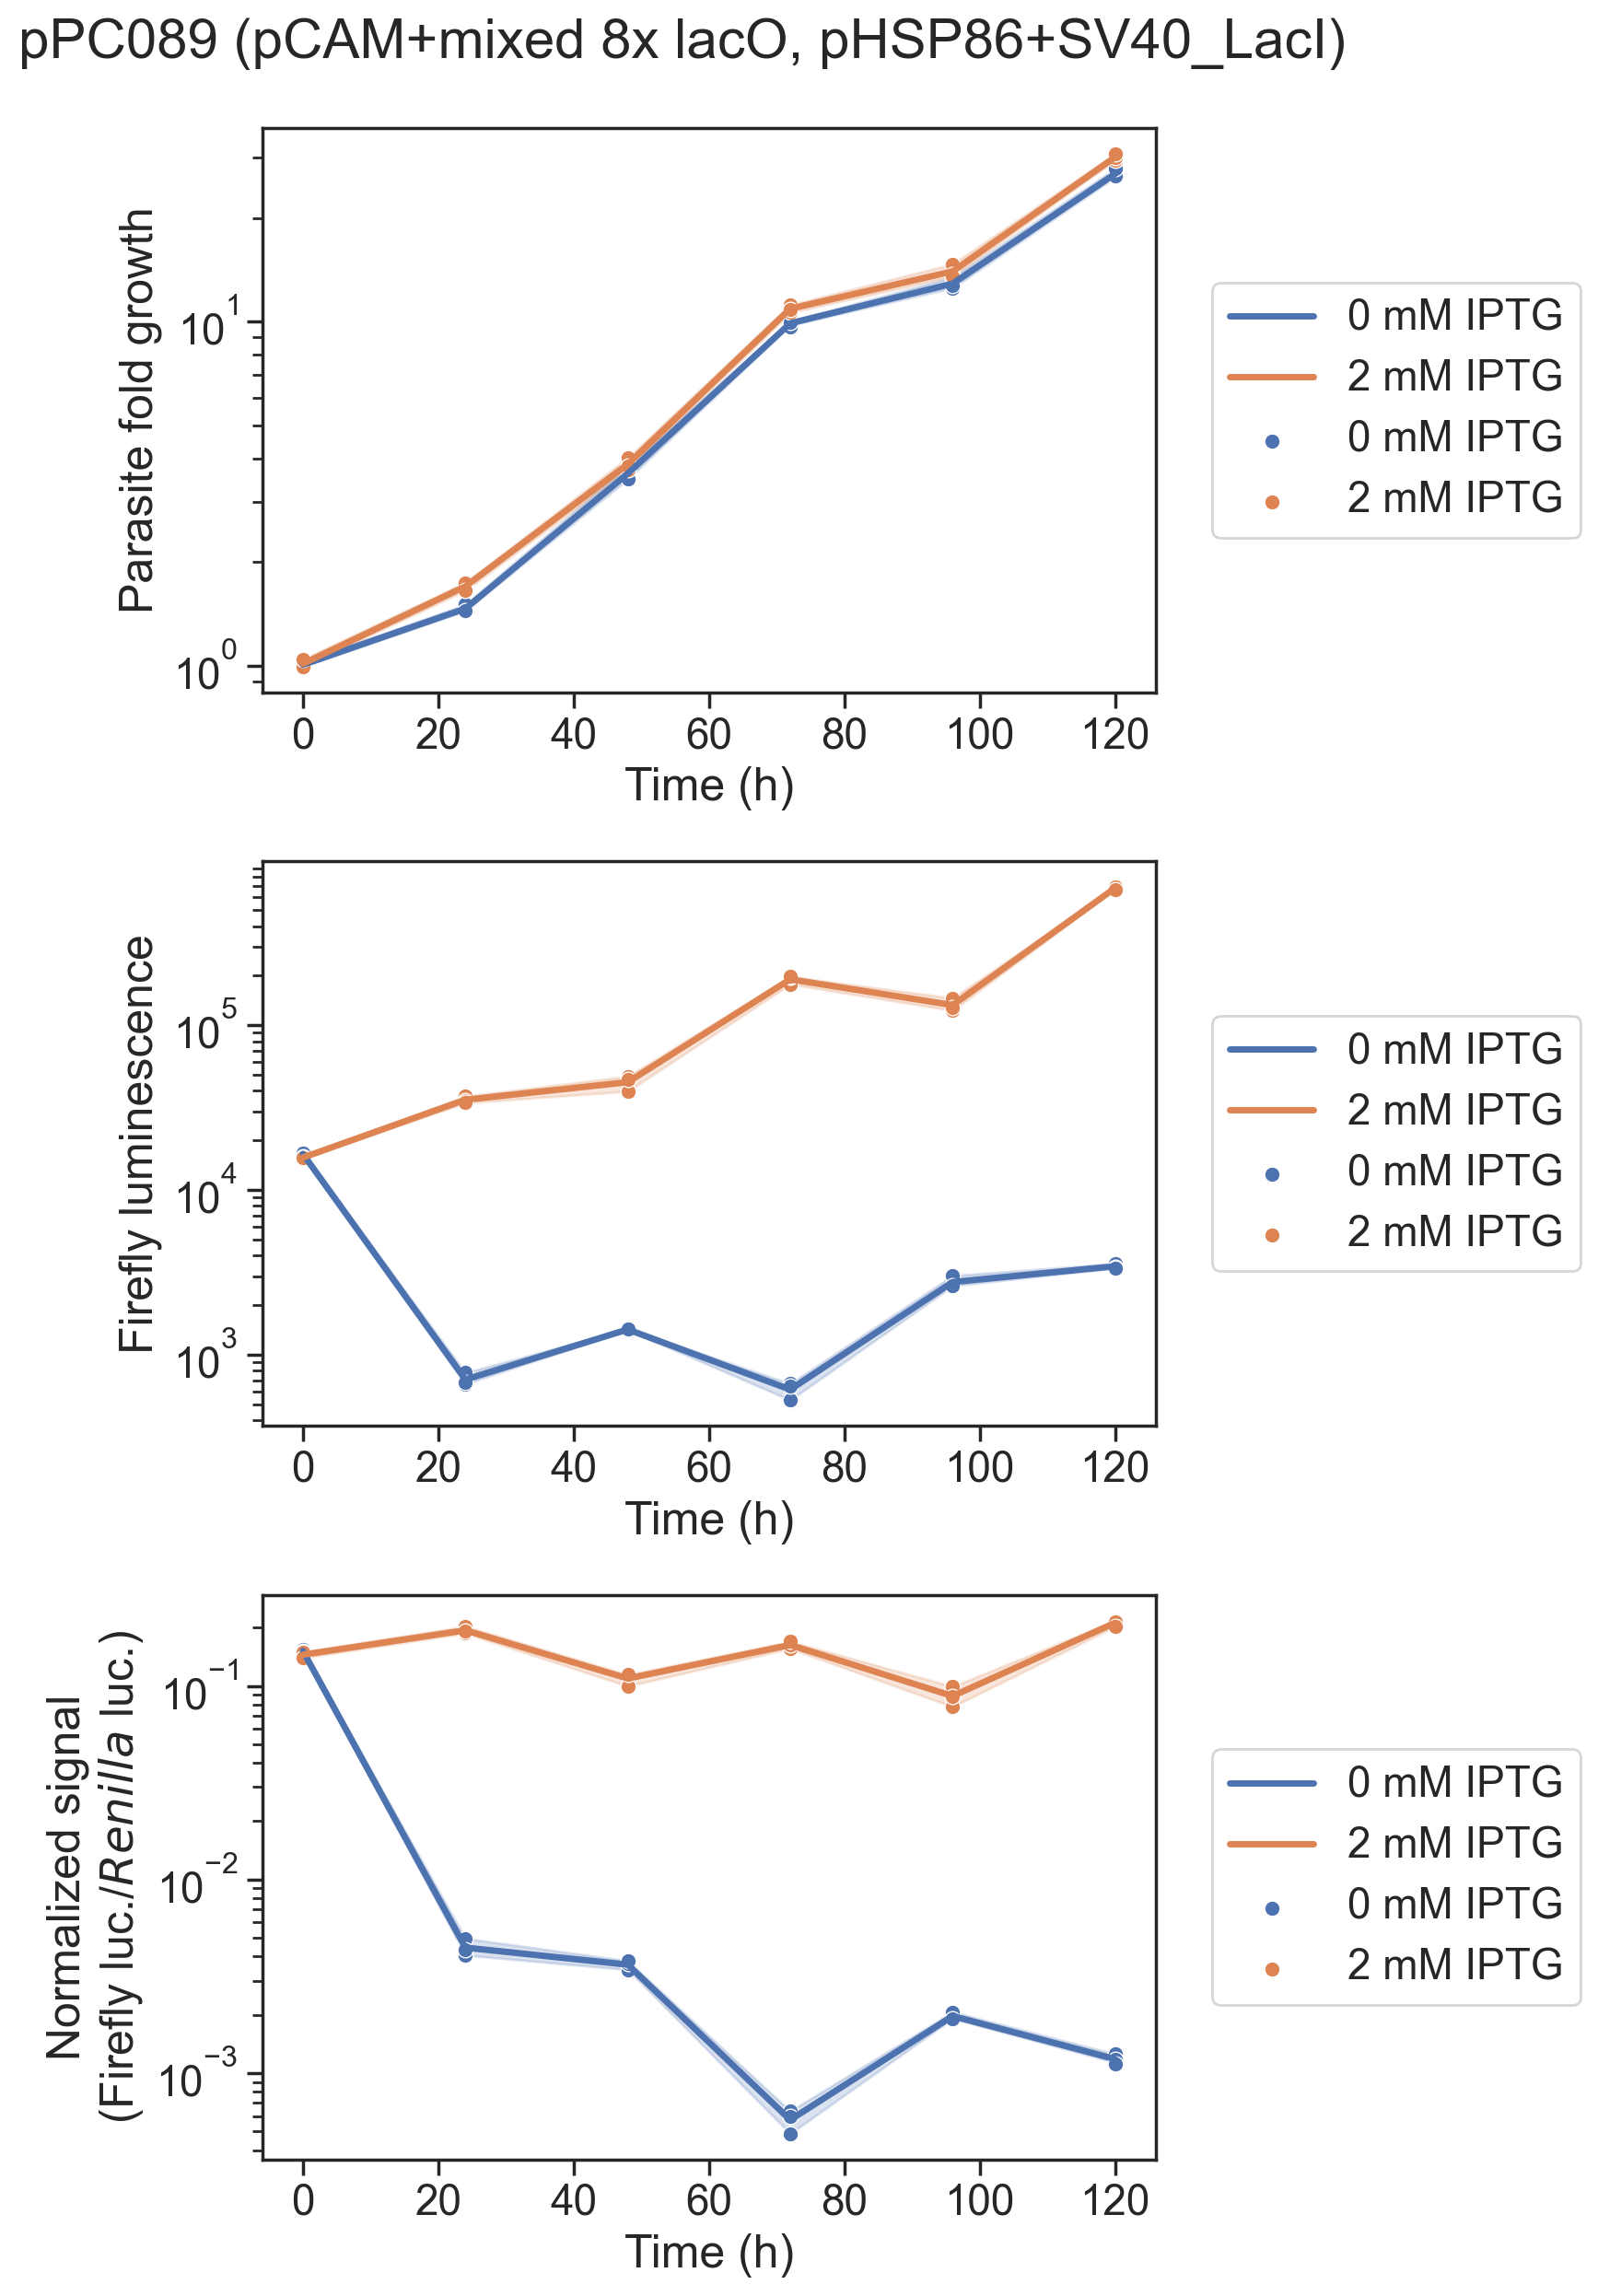

In [87]:
# Fig. S2E
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Apr 2022 - pPC089_onToOff_try2.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'pPC089 (pCAM+mixed 8x lacO, pHSP86+SV40_LacI)',lab_1='0 mM IPTG',lab_2='2 mM IPTG')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_884/3239787856.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, 1)


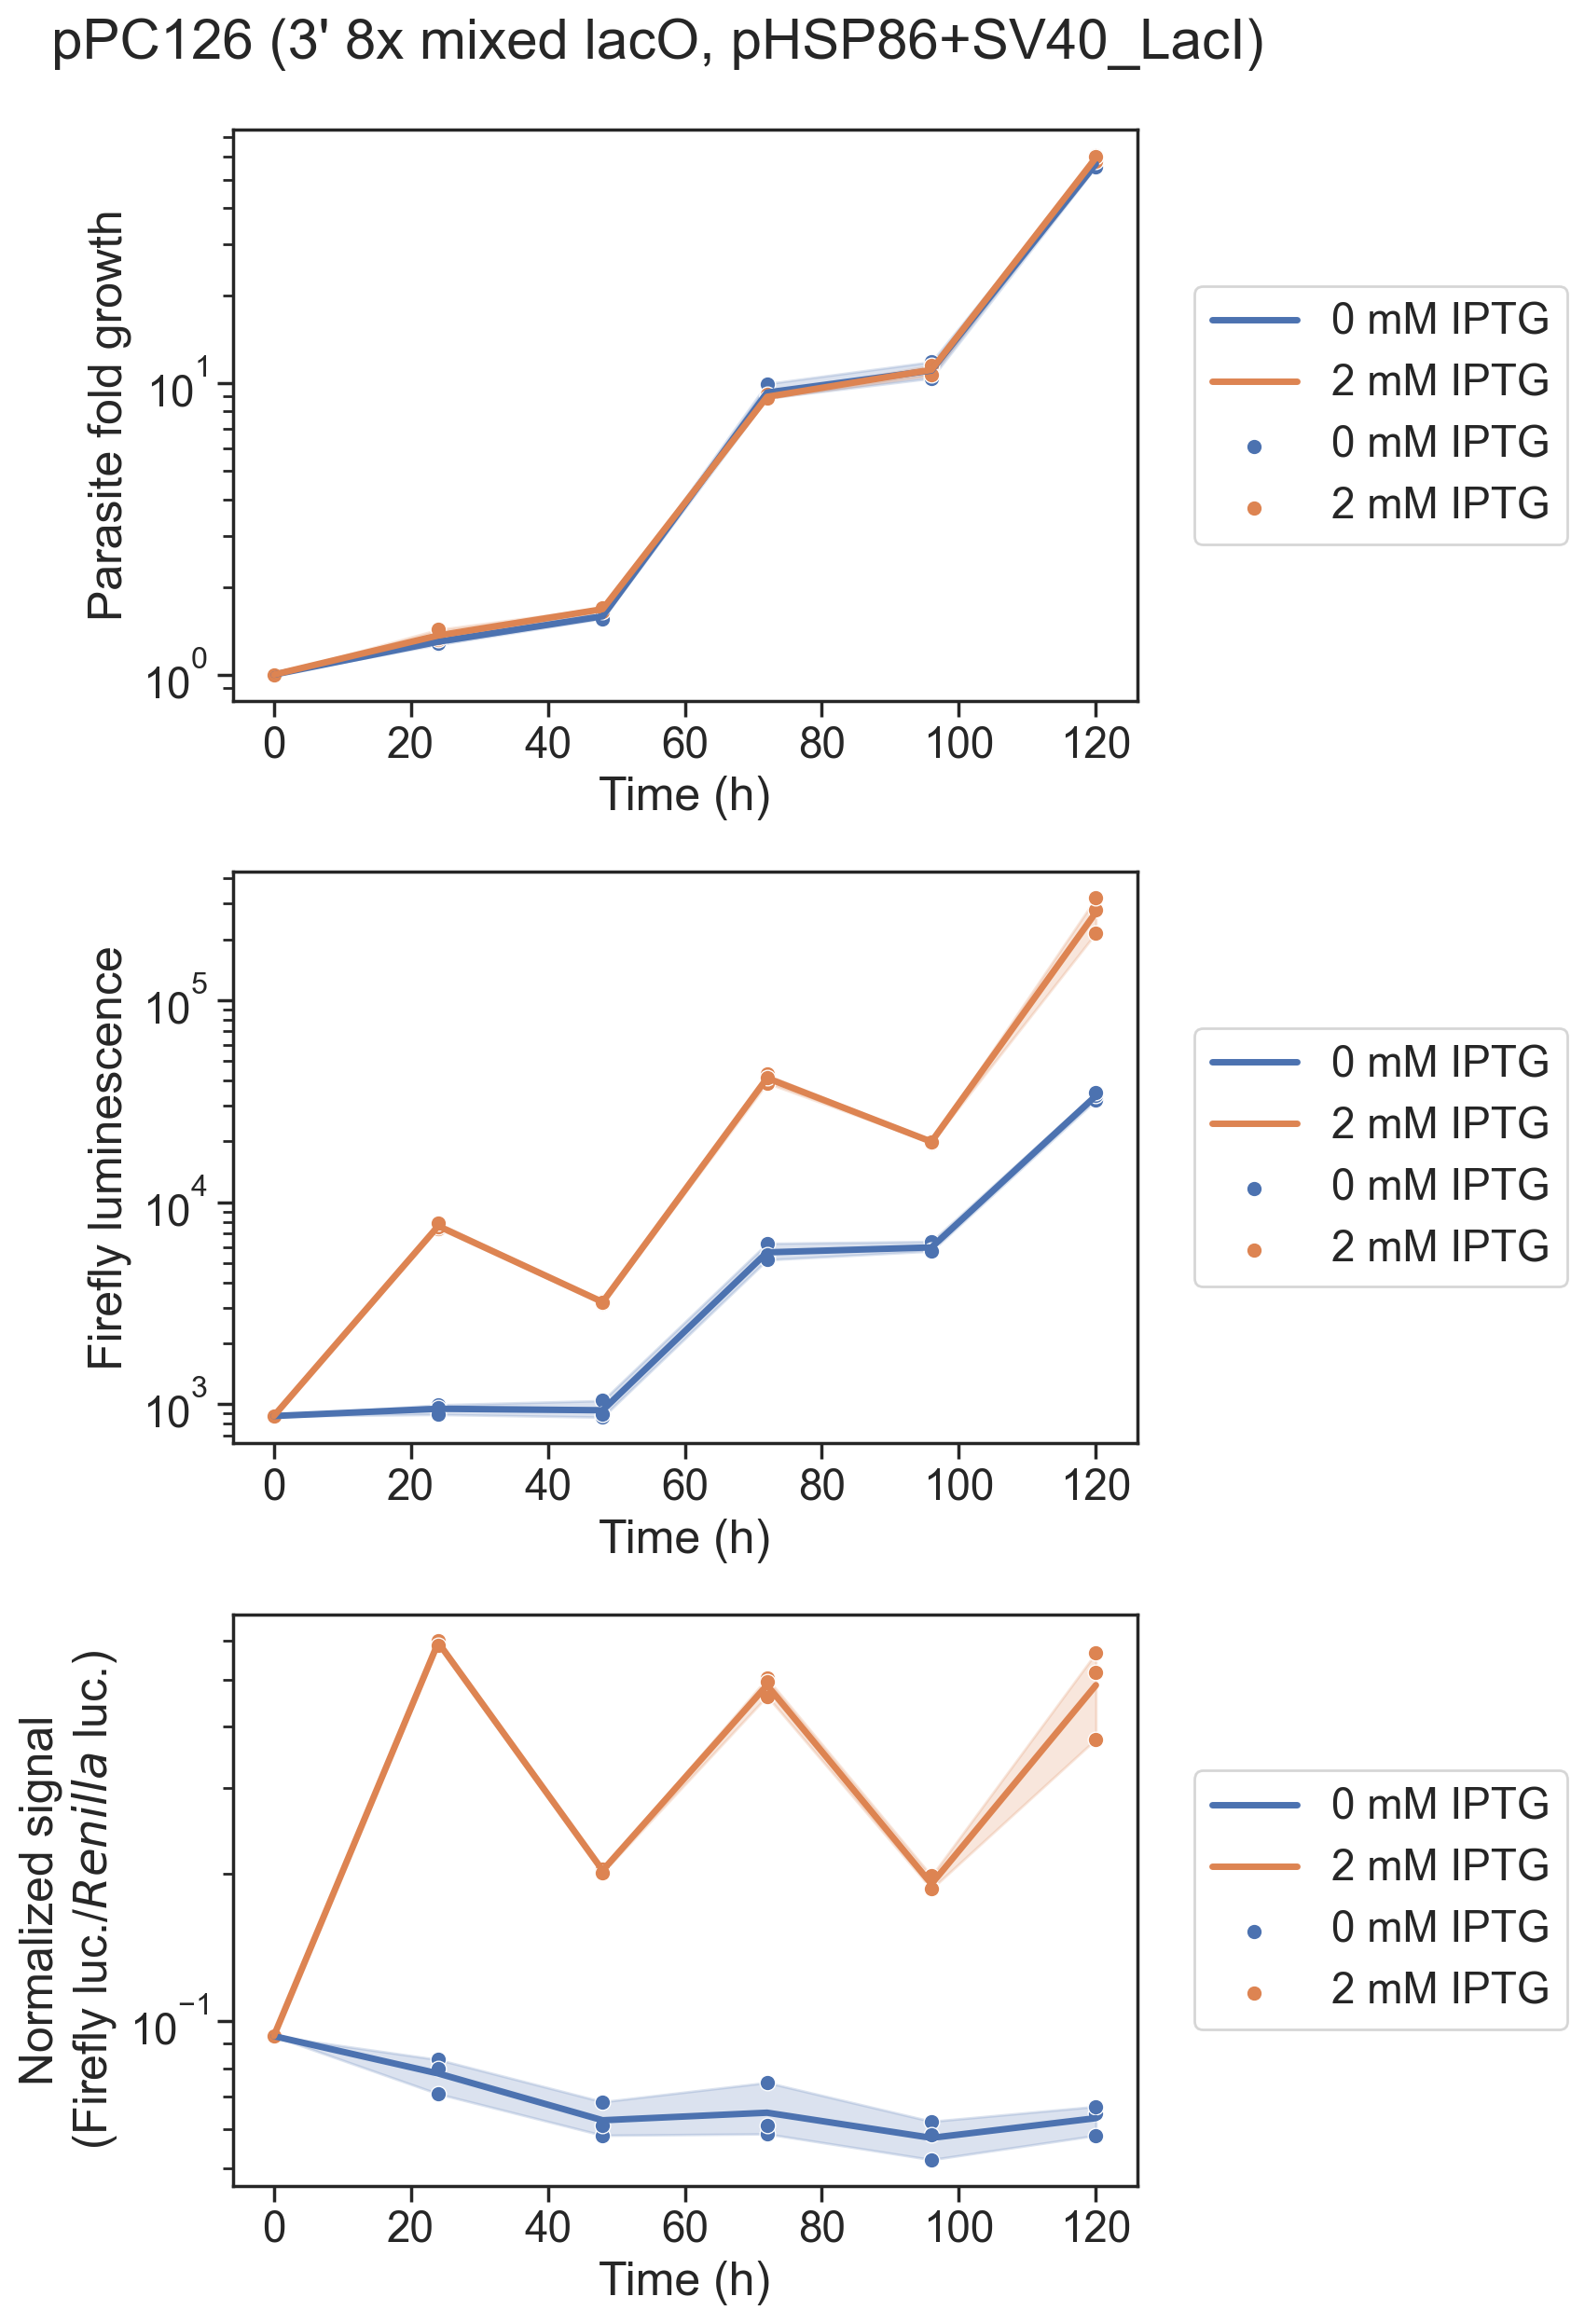

In [88]:
# Fig. S1F
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Mar Apr May 2023 - pPC126 May 2023.csv')
dat = dat.loc[dat['Hours']<121,]
plotTimeSeries(dat,'pPC126 (3\' 8x mixed lacO, pHSP86+SV40_LacI)',lab_1='0 mM IPTG',lab_2='2 mM IPTG')

In [13]:
# Figure 2

0.020695287433628026
0.023686795042942483
0.01657009403002034
0.018333607789997788


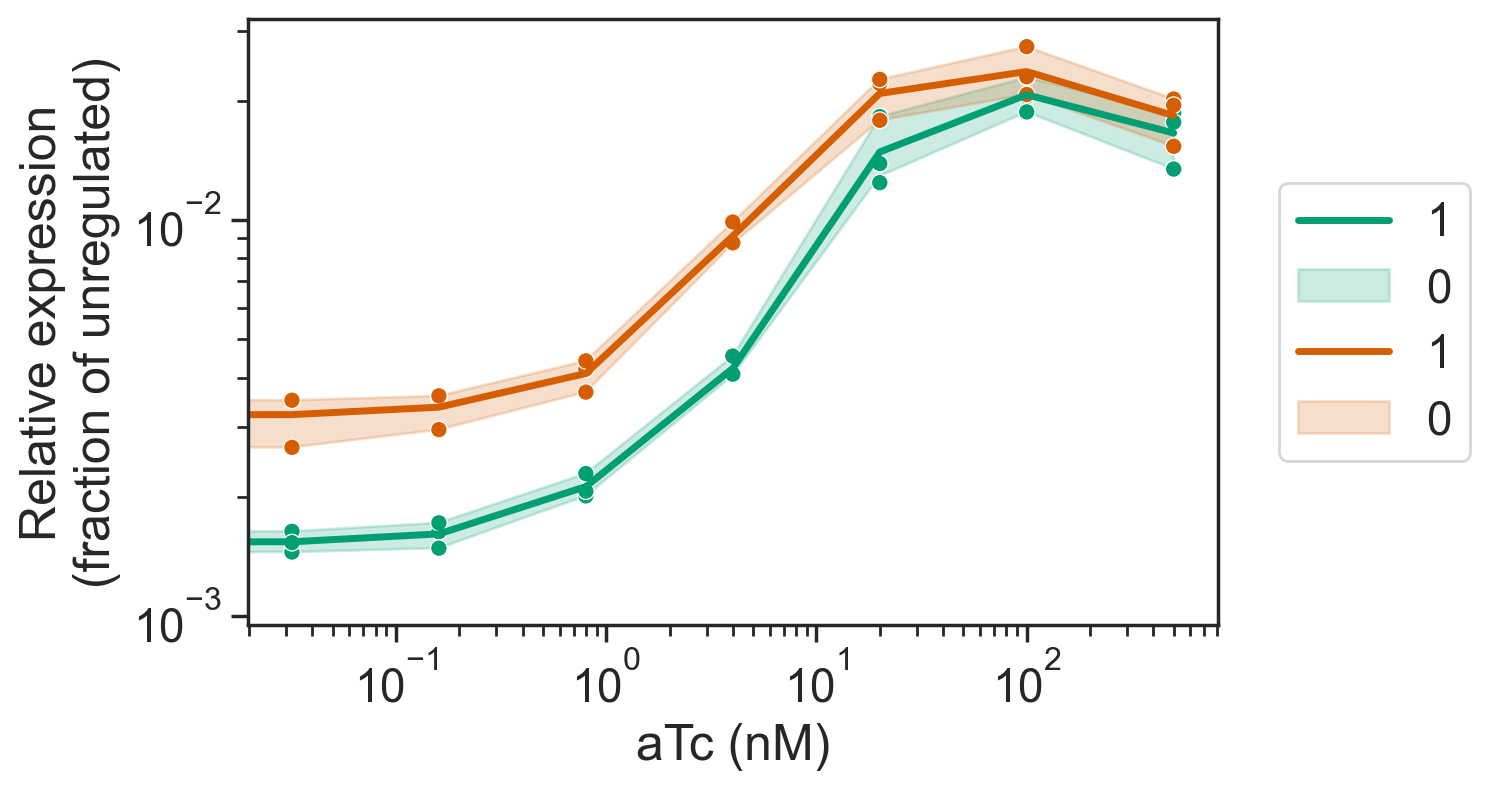

In [57]:
# Fig 2B
dat = pd.read_csv('dat/Transcriptional regulation induction curve aTc pPC009 pPC071 March April 2023 - 6_7 April.csv')

threshold = 0.25
palette=['#009E73','#D55E00']

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

ax = plt.subplot(1, 1, 1)
dat['rluc'] = np.maximum(dat.RLuc-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
dat['fluc'] = np.maximum(dat.FLuc-dat.FLuc_bkgr,dat.FLuc_bkgr*threshold)
dat['sig'] = (dat.fluc/dat.rluc)
dat.loc[dat['NLS']=='NLS','sig'] = dat.loc[dat['NLS']=='NLS','sig'] / sig_unreg_pmrpl2
dat.loc[dat['NLS']=='No NLS','sig'] = dat.loc[dat['NLS']=='No NLS','sig'] / sig_unreg_pcam

ax = sns.lineplot(data=dat, x='aTc_nM',y=dat.sig, hue='NLS', palette=palette)
ax = sns.scatterplot(data=dat, x='aTc_nM',y=dat.sig, hue='NLS', palette=palette)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlabel='aTc (nM)', ylabel="Relative expression\n(fraction of unregulated)")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", labels=[1,0,1,0])

# plt.savefig('TetR_induction.png', bbox_inches='tight')

print(dat.loc[(dat['aTc_nM']==100)&(dat['NLS']=='NLS'),'sig'].mean())
print(dat.loc[(dat['aTc_nM']==100)&(dat['NLS']=='No NLS'),'sig'].mean())
print(dat.loc[(dat['aTc_nM']==500)&(dat['NLS']=='NLS'),'sig'].mean())
print(dat.loc[(dat['aTc_nM']==500)&(dat['NLS']=='No NLS'),'sig'].mean())
# print(dat)

Strain
pPC071    20.555853
pPC094     1.771573
pPC095    52.510415
pPC096    19.961645
pPC097    15.444811
Name: fold_ind, dtype: float64


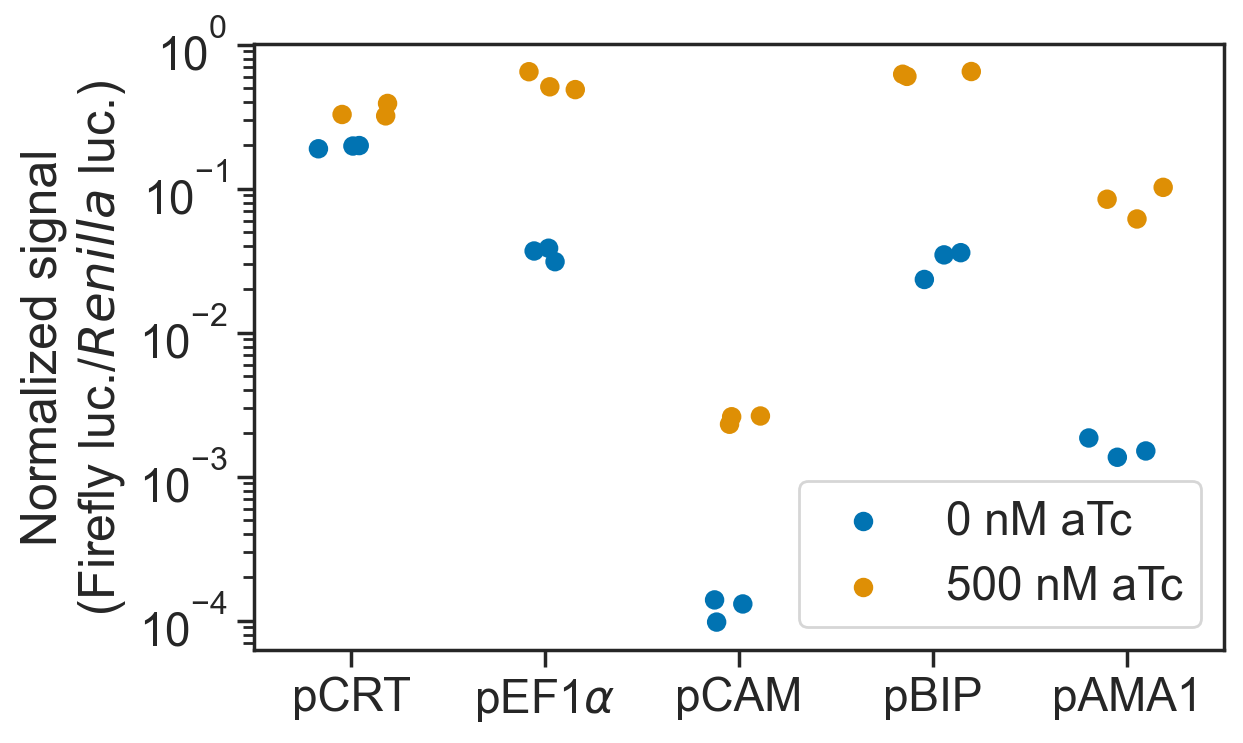

In [90]:
# Fig 2D
def plotFoldInduction(
        dat_in,sig_unreg,title,lab_1='0 nM aTc',lab_2='500 nM aTc',order=['pPC094','pPC071','pPC097','pPC096','pPC095'],
        log_scale=True,threshold=0.25):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    
    pmRPL2_pCAM = 400/30
    
    dat.loc[dat['Strain']=='pPC071','rluc_off'] = dat.loc[dat['Strain']=='pPC071','rluc_off'] * pmRPL2_pCAM
    dat.loc[dat['Strain']=='pPC071','rluc_on'] = dat.loc[dat['Strain']=='pPC071','rluc_on'] * pmRPL2_pCAM
#     dat.loc[dat['Strain']=='pPC082','rluc_off'] = dat.loc[dat['Strain']=='pPC082','rluc_off'] * pmRPL2_pCAM
#     dat.loc[dat['Strain']=='pPC082','rluc_on'] = dat.loc[dat['Strain']=='pPC082','rluc_on'] * pmRPL2_pCAM
    
    dat[lab_1] = ( dat['fluc_off']/dat['rluc_off'] )# / sig_unreg
    dat[lab_2] = ( dat['fluc_on']/dat['rluc_on'] )# / sig_unreg
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', order=order, size=7, jitter=0.2, data=dat_m)
    
    ax.set_yscale('log')
    ax.set(xlabel='', ylabel="Normalized signal\n(Firefly luc./$\it{Renilla}$ luc.)")
    ax.set_xticks(order)
    ax.set_xticklabels(['pCRT',r'pEF1$\alpha$','pCAM','pBIP','pAMA1'],rotation=0)#ax.get_xticklabels()
    plt.legend(title='',loc="lower right")
#     plt.ylim(1e-4,1.5)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])
    
dat = pd.read_csv('dat/Fig 2 transcriptional regulation - prom_vars_lowTetR.csv')
dat_rep = dat.loc[dat['Strain'].isin(['pPC094','pPC097','pPC071','pPC096','pPC095']),].copy()
plotFoldInduction(dat_rep,sig_unreg,'dat_rep',order=['pPC094','pPC097','pPC071','pPC096','pPC095'])

In [17]:
# Figure 3

0.4314652744793948
0.40546342810347796
0.4571215550829166
0.39602838214868125


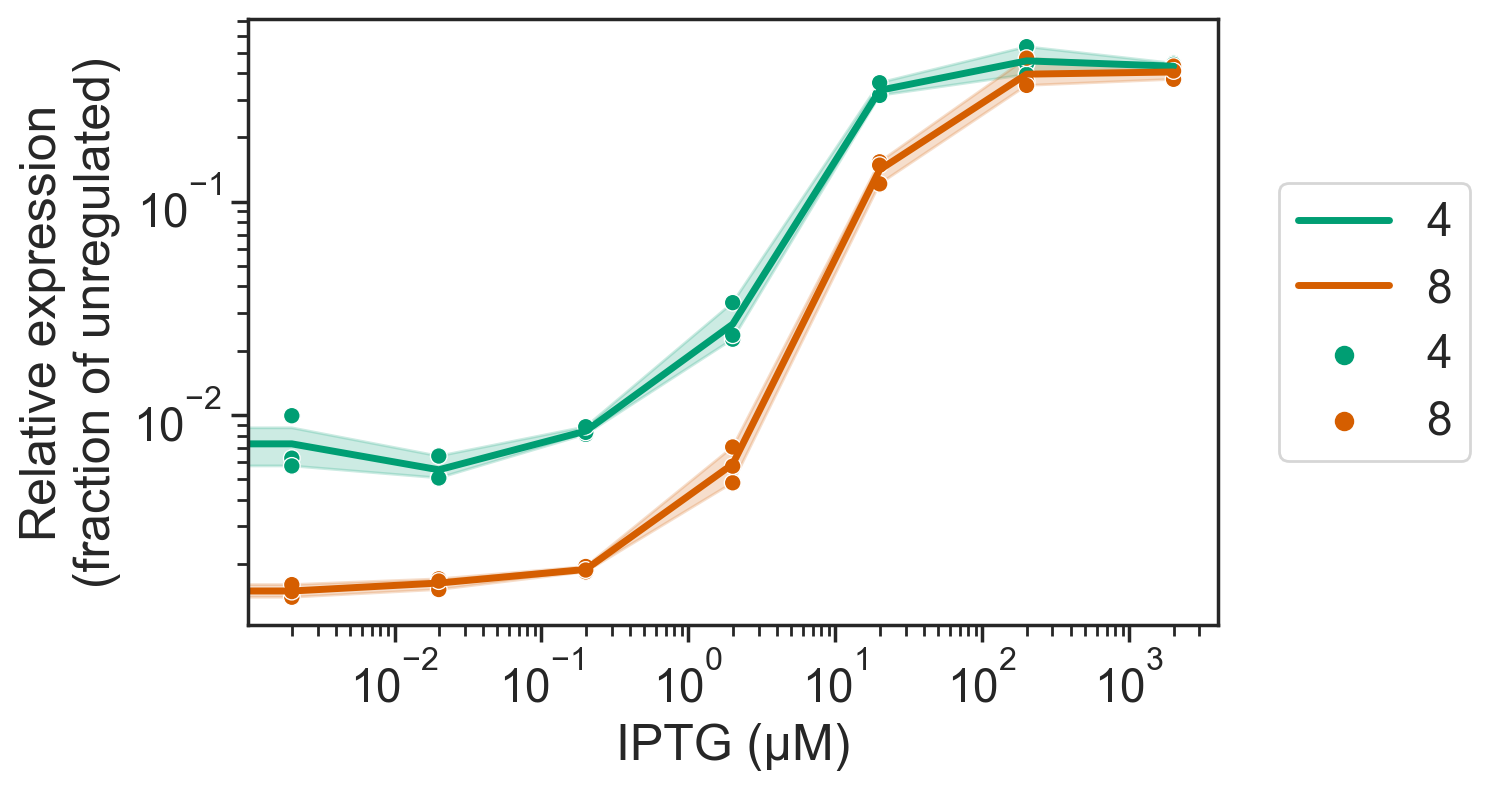

In [41]:
# Fig 3B
dat = pd.read_csv('dat/Transcriptional regulation induction curve IPTG pPC088 pPC089 6 March 2023 - Sheet1.csv')
dat = dat.loc[dat['Hours']>0,]

threshold = 0.25
palette=['#009E73','#D55E00']

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

ax = plt.subplot(1, 1, 1)
dat['rluc'] = np.maximum(dat.RLuc-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
dat['fluc'] = np.maximum(dat.FLuc-dat.FLuc_bkgr,dat.FLuc_bkgr*threshold)
dat['sig'] = (dat.fluc/dat.rluc) / sig_unreg_pcam

ax = sns.lineplot(data=dat, x='IPTG_microM',y=dat.sig, hue='Num_operators', palette=palette)
ax = sns.scatterplot(data=dat, x='IPTG_microM',y=dat.sig, hue='Num_operators', palette=palette)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlabel='IPTG (µM)', ylabel="Relative expression\n(fraction of unregulated)")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

# plt.savefig('LacI_induction.png', bbox_inches='tight')
print(dat.loc[(dat['IPTG_microM']==2000)&(dat['Num_operators']==4),'sig'].mean())
print(dat.loc[(dat['IPTG_microM']==2000)&(dat['Num_operators']==8),'sig'].mean())
print(dat.loc[(dat['IPTG_microM']==200)&(dat['Num_operators']==4),'sig'].mean())
print(dat.loc[(dat['IPTG_microM']==200)&(dat['Num_operators']==8),'sig'].mean())

Strain
pPC089    409.052087
pPC111    212.357617
pPC112    519.410258
pPC113    829.990304
pPC114    292.083524
Name: fold_ind, dtype: float64


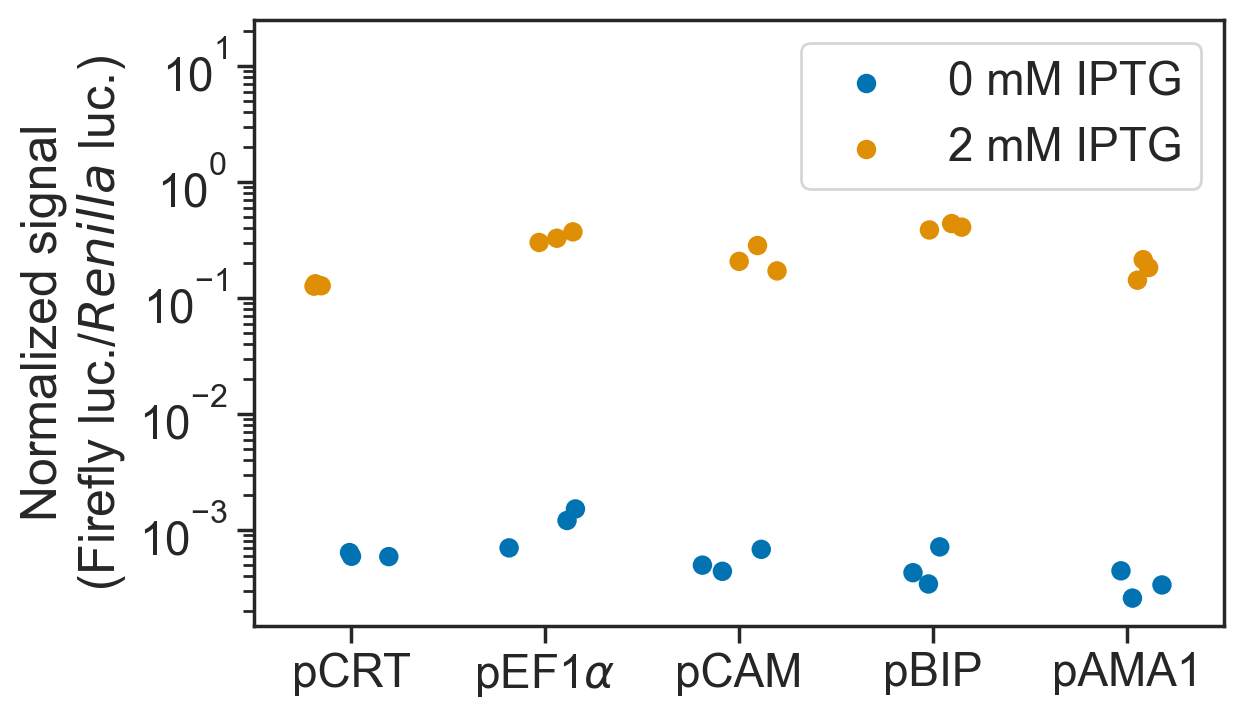

In [92]:
# Fig 3D
def plotFoldInduction(
        dat_in,sig_unreg,title,lab_1='0 nM aTc',lab_2='500 nM aTc',order=['pPC111','pPC089','pPC114','pPC113','pPC112'],
        log_scale=True,threshold=0.005):
    
    dat = dat_in
    dat['rluc_off'] = np.maximum(dat.RLuc_0-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_off'] = np.maximum(dat.FLuc_0-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['rluc_on'] = np.maximum(dat.RLuc_1-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    dat['fluc_on'] = np.maximum(dat.FLuc_1-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    
    pmRPL2_pCAM = 400/30
    
    dat.loc[dat['Strain']=='pPC071','rluc_off'] = dat.loc[dat['Strain']=='pPC071','rluc_off'] * pmRPL2_pCAM
    dat.loc[dat['Strain']=='pPC071','rluc_on'] = dat.loc[dat['Strain']=='pPC071','rluc_on'] * pmRPL2_pCAM
#     dat.loc[dat['Strain']=='pPC082','rluc_off'] = dat.loc[dat['Strain']=='pPC082','rluc_off'] * pmRPL2_pCAM
#     dat.loc[dat['Strain']=='pPC082','rluc_on'] = dat.loc[dat['Strain']=='pPC082','rluc_on'] * pmRPL2_pCAM
    
    dat[lab_1] = ( dat['fluc_off']/dat['rluc_off'] )# / sig_unreg
    dat[lab_2] = ( dat['fluc_on']/dat['rluc_on'] )# / sig_unreg
    
    dat_off = dat.groupby(['Strain']).mean().reset_index()
    dat_off_len = dat_off.shape[0]
    dat_off = pd.concat( [dat_off]*3 ).reset_index(drop=True)
    dat['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
    dat_off['sig_off_mean'] = dat_off[lab_1]
    dat_off = dat_off[['Strain','Replicate','sig_off_mean']]
    dat = dat.merge(dat_off, how='outer', on=['Strain','Replicate'])
    
    dat['fold_ind'] = dat[lab_2]/dat['sig_off_mean']
    
    dat_m = pd.melt(dat, id_vars=['Strain'], value_vars=[lab_1, lab_2])
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()

    ax = plt.subplot(1, 1, 1)
    ax = sns.stripplot(x="Strain", y="value", hue='variable', palette='colorblind', order=order, size=7, jitter=0.2, data=dat_m)
    
    ax.set_yscale('log')
    ax.set(xlabel='', ylabel="Normalized signal\n(Firefly luc./$\it{Renilla}$ luc.)")
    ax.set_xticks(order)
    ax.set_xticklabels(['pCRT',r'pEF1$\alpha$','pCAM','pBIP','pAMA1'],rotation=0)#ax.get_xticklabels()
    plt.legend(title='', loc="upper right")
    plt.ylim(1.5e-4,25)
    print(dat.groupby('Strain').aggregate('mean')['fold_ind'])
    
dat = pd.read_csv('dat/Fig 2 transcriptional regulation - prom_vars_Lac.csv')
dat_rep = dat.loc[dat['Strain'].isin(['pPC111','pPC114','pPC089','pPC113','pPC112']),].copy()
plotFoldInduction(dat_rep,sig_unreg,'dat_rep',order=['pPC111','pPC114','pPC089','pPC113','pPC112'],lab_1='0 mM IPTG',lab_2='2 mM IPTG')

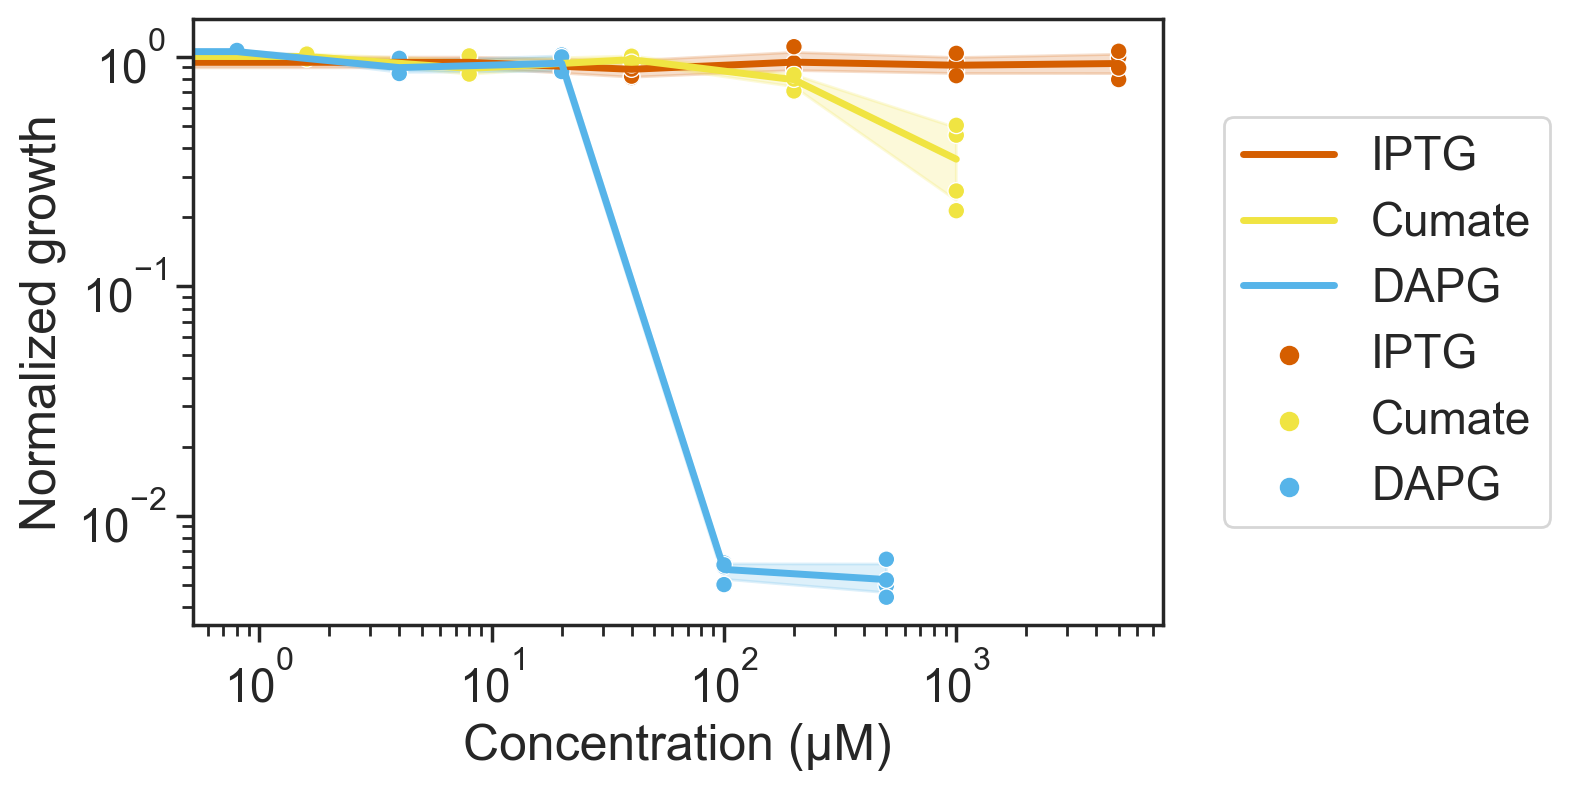

In [96]:
# Fig 3B
dat = pd.read_csv('dat/Parasite inducer toxicity assays - csv.csv')

palette=['#D55E00','#F0E442','#56B4E9']

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

ax = plt.subplot(1, 1, 1)

ax = sns.lineplot(data=dat, x='Concentration',y='Normalized growth', hue='Molecule', palette=palette)
ax = sns.scatterplot(data=dat, x='Concentration',y='Normalized growth', hue='Molecule', palette=palette)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlabel='Concentration (µM)', ylabel="Normalized growth")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

# plt.savefig('LacI_induction.png', bbox_inches='tight')
# print(dat.loc[(dat['IPTG_microM']==2000)&(dat['Num_operators']==4),'sig'].mean())
# print(dat.loc[(dat['IPTG_microM']==2000)&(dat['Num_operators']==8),'sig'].mean())
# print(dat.loc[(dat['IPTG_microM']==200)&(dat['Num_operators']==4),'sig'].mean())
# print(dat.loc[(dat['IPTG_microM']==200)&(dat['Num_operators']==8),'sig'].mean())

In [93]:
# Fig S1D
def plotLines(
        x,y_1,y_2,lab_1='0 nM aTc',lab_2='500 nM aTc',
        x_lab='Time (h)',y_lab=r'$\it{Renilla}$ luminescence',
        log_scale=True, palette=sns.color_palette(), y_lim=None):
    ax = sns.lineplot(x=x,y=y_1, label = lab_1, color=palette[0])
    ax = sns.lineplot(x=x,y=y_2, label = lab_2, color=palette[1])
    ax = sns.scatterplot(x=x,y=y_1, label = lab_1, color=palette[0])
    ax = sns.scatterplot(x=x,y=y_2, label = lab_2, color=palette[1])
    if log_scale:
        ax.set_yscale('log')
        
    if y_lim is not None:
        plt.ylim(y_lim[0],y_lim[1])
        
    ax.set(xlabel=x_lab, ylabel=y_lab)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
    
    return ax

def plotTimeSeries(
        dat,title,lab_1='0 nM aTc',lab_2='200 nM aTc',
        log_scale=True,threshold=0.25,sig_unreg=sig_unreg):
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=200)
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    fig.suptitle(title,y=1.02)
    
    ax = plt.subplot(1, 1, 1)
    rluc_off = np.maximum(dat.RLuc_0aTc-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    fluc_off = np.maximum(dat.FLuc_0aTc-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    rluc_on = np.maximum(dat.RLuc_1aTc-dat.RLuc_bkgr,dat.RLuc_bkgr*threshold)
    fluc_on = np.maximum(dat.FLuc_1aTc-dat.FLuc_bkgr,dat.RLuc_bkgr*threshold)
    grow_off = rluc_off / rluc_off[0]
    grow_on = rluc_on / rluc_on[0]
    plotLines(
        dat.Hours,grow_off,grow_on,
        x_lab='Time (h)',y_lab='Parasite fold growth',
#         dat.Hours,rluc_off,rluc_on,
#         x_lab='Time (h)',y_lab=r'$\it{Renilla}$ luminescence',
        lab_1=lab_1,lab_2=lab_2,log_scale=log_scale
        )
    

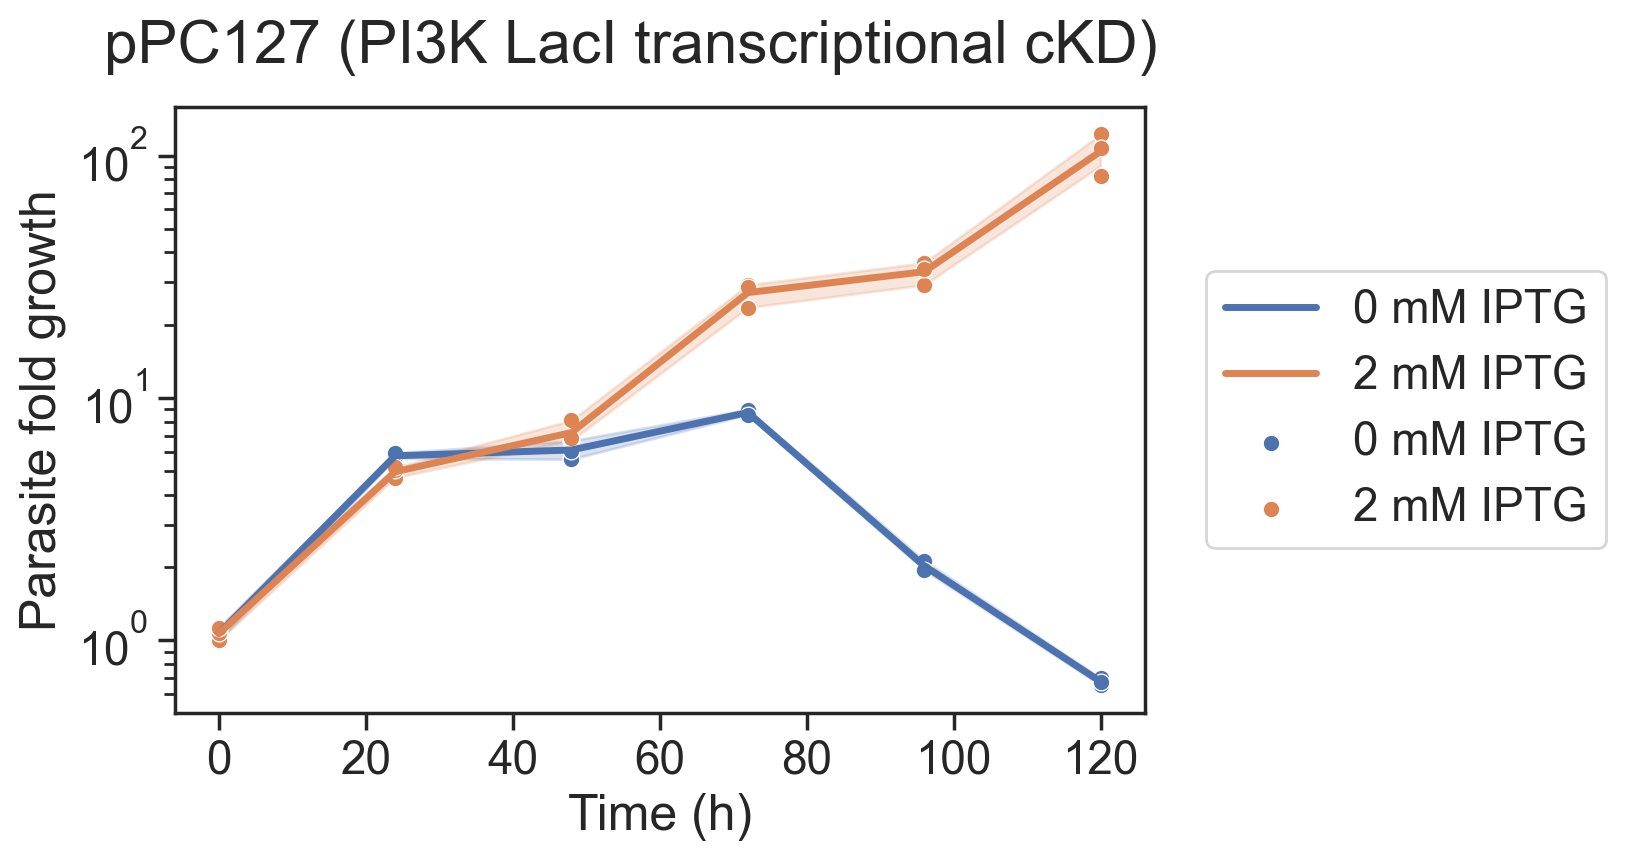

In [94]:

# Fig 3C
dat = pd.read_csv('dat/Transcriptional regulation parasite data—Aug 2023 - pPC127.csv')
plotTimeSeries(dat,'pPC127 (PI3K LacI transcriptional cKD)',lab_1='0 mM IPTG',lab_2='2 mM IPTG')

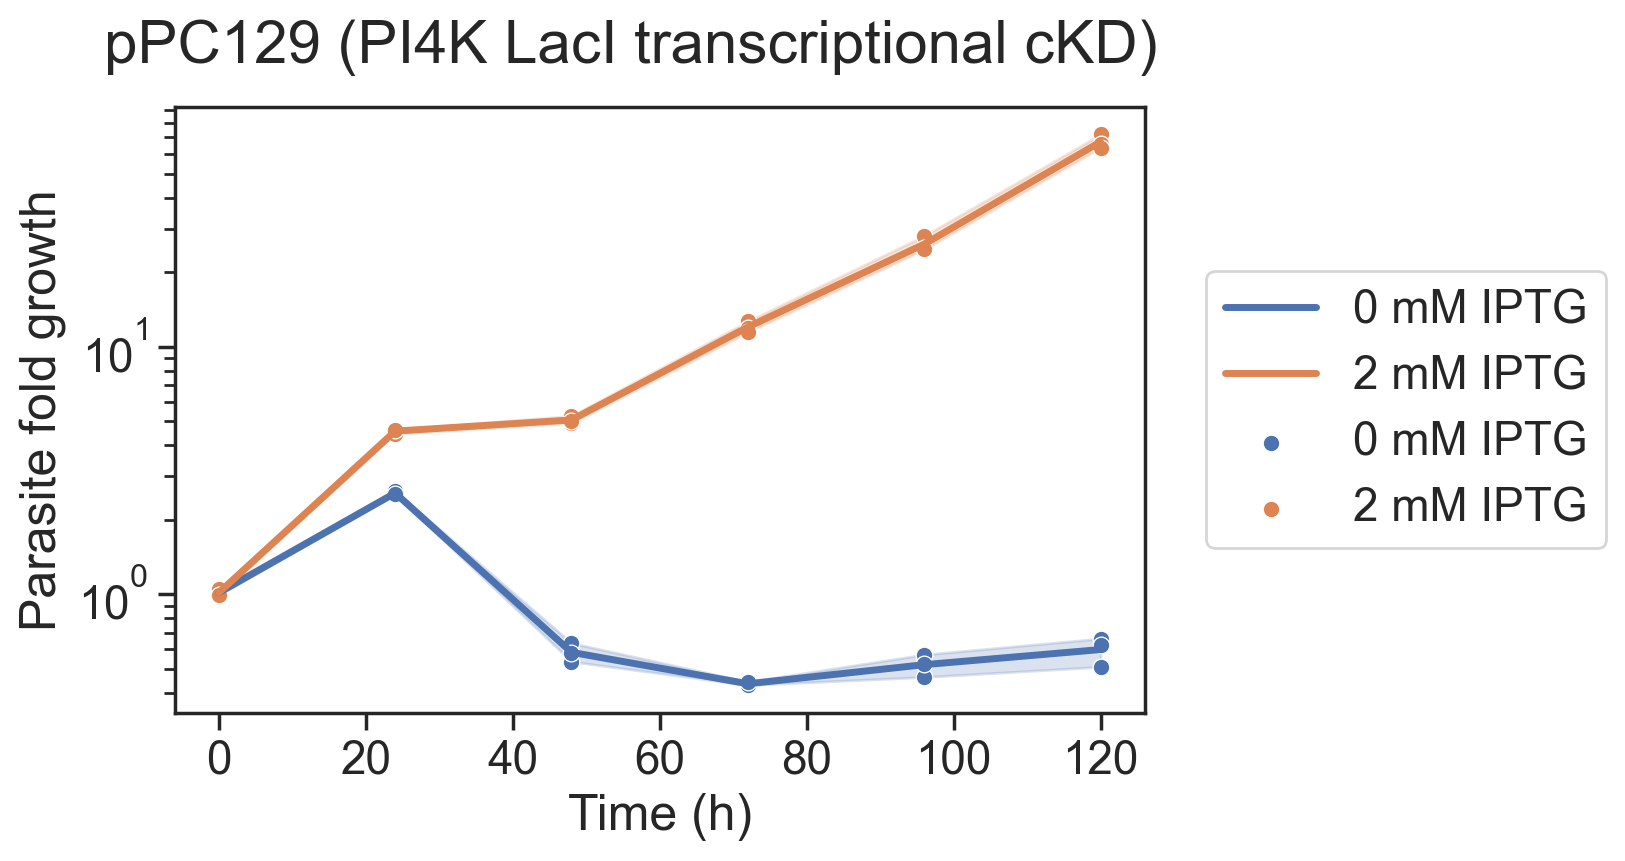

In [96]:
# Fig 3C
dat = pd.read_csv('Transcriptional regulation parasite data—Aug-Dec 2023 - pPC129.csv')
plotTimeSeries(dat,'pPC129 (PI4K LacI transcriptional cKD)',lab_1='0 mM IPTG',lab_2='2 mM IPTG')